---
# SETUP
---

In [1]:
import os
import csv
import json
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm

from src.data_collection import GitHubDataCollector
from src.repos_extractor import GitHubRepoExtractor
from src.database_extractor import GitHubDatabaseExtractor
from src.doc_assessor import GitHubDocAssessor

---
# DATA COLLECTION
---

## 1. Data Scrapping 

### [1.1] Scrap Egyption Users

To overcome the **1,000**-user limit, the script employs a targeted approach:


1. **Date-Based Filtering:**  
Instead of attempting to retrieve all users at once, the search is narrowed down by specific creation dates. The script begins by scraping users created before September 2013 ( `created:2013-09`) then (`created:2013-10`) then (`created:2013-11`), and so on, until now (`created:2024-10`). 

2. **Follower Count Threshold:** The query includes `repos:>0` to specifically target users who have created at least one public repository.


In [2]:
end_point = "https://api.github.com/search/users"

params = {"q": "",
          "per_page": 100,
          "page": 1}

collector = GitHubDataCollector()

In [ ]:
# This script is used to scrape Egyptian users from GitHub.
current_year = 2013
current_month= 8
failed_queries = [] # store unscrapped date to be scrapped again
scrapped_users = []

while current_year <= 2024:
    while current_month <= 12:
The script will scrape users according to the following criteria:
        if current_year == 2024 and current_month > 11:
            break  # Stop if Ireach the end month

        if current_year == 2013 and current_month == 8:
            params["q"] = "location:egypt repos:>0 created:<2013-09"

        else:
            params["q"] = f"location:egypt repos:>0 created:{current_year}-{current_month:02}", 
        scrapped_users.append(
            collector.scrap_egy_users(
                        params=params, endpoint=end_point, 
                        date = f"{current_year}-{current_month:02}")
            )

        current_month += 1

    current_month = 1  # Reset month to 1 for the next year
    current_year += 1

Extract 954 Users [2013-08]: Page 10/10 : 100%|██████████| 54/54 [00:00<00:00, 145841.86it/s]


Extract 56 Users [2013-09]: Page 01/1 : 100%|██████████| 56/56 [00:00<00:00, 111741.69it/s]


Extract 45 Users [2013-10]: Page 01/1 : 100%|██████████| 45/45 [00:00<00:00, 129720.74it/s]


Extract 63 Users [2013-11]: Page 01/1 : 100%|██████████| 63/63 [00:00<00:00, 143765.59it/s]


Extract 53 Users [2013-12]: Page 01/1 : 100%|██████████| 53/53 [00:00<00:00, 130533.24it/s]


Extract 61 Users [2014-01]: Page 01/1 : 100%|██████████| 61/61 [00:00<00:00, 94445.38it/s]


Extract 69 Users [2014-02]: Page 01/1 : 100%|██████████| 69/69 [00:00<00:00, 170943.28it/s]


Extract 82 Users [2014-03]: Page 01/1 : 100%|██████████| 82/82 [00:00<00:00, 220752.84it/s]


Extract 77 Users [2014-04]: Page 01/1 : 100%|██████████| 77/77 [00:00<00:00, 213881.73it/s]


Extract 94 Users [2014-05]: Page 01/1 : 100%|██████████| 94/94 [00:00<00:00, 192794.41it/s]


Extract 72 Users [2014-06]: Page 01/1 : 100%|██████████| 72/72 [00:00<00:00, 140199.58it/s]


Extract 63 Users [2014-07]: Page 01/1 : 100%|██████████| 63/63 [00:00<00:00, 149966.60it/s]


Extract 70 Users [2014-08]: Page 01/1 : 100%|██████████| 70/70 [00:00<00:00, 218615.99it/s]


Extract 67 Users [2014-09]: Page 01/1 : 100%|██████████| 67/67 [00:00<00:00, 196791.57it/s]


Extract 102 Users [2014-10]: Page 02/2 : 100%|██████████| 2/2 [00:00<00:00, 7936.24it/s]


Extract 80 Users [2014-11]: Page 01/1 : 100%|██████████| 80/80 [00:00<00:00, 219740.88it/s]


Extract 75 Users [2014-12]: Page 01/1 : 100%|██████████| 75/75 [00:00<00:00, 229615.18it/s]


Extract 100 Users [2015-01]: Page 01/2 : 100%|██████████| 100/100 [00:00<00:00, 201165.66it/s]
Extract 100 Users [2015-01]: Page 02/2 : 0it [00:00, ?it/s]


Extract 130 Users [2015-02]: Page 02/2 : 100%|██████████| 30/30 [00:00<00:00, 118371.70it/s]


Extract 123 Users [2015-03]: Page 02/2 : 100%|██████████| 23/23 [00:00<00:00, 62887.22it/s]


Extract 115 Users [2015-04]: Page 02/2 : 100%|██████████| 15/15 [00:00<00:00, 84335.87it/s]


Extract 98 Users [2015-05]: Page 01/1 : 100%|██████████| 98/98 [00:00<00:00, 49250.15it/s]


Extract 117 Users [2015-06]: Page 02/2 : 100%|██████████| 17/17 [00:00<00:00, 56815.27it/s]


Extract 85 Users [2015-07]: Page 01/1 : 100%|██████████| 85/85 [00:00<00:00, 75533.02it/s]


Extract 116 Users [2015-08]: Page 02/2 : 100%|██████████| 16/16 [00:00<00:00, 82748.29it/s]


Extract 114 Users [2015-09]: Page 02/2 : 100%|██████████| 14/14 [00:00<00:00, 72583.75it/s]


Extract 104 Users [2015-10]: Page 02/2 : 100%|██████████| 4/4 [00:00<00:00, 14004.35it/s]


Extract 128 Users [2015-11]: Page 02/2 : 100%|██████████| 28/28 [00:00<00:00, 149225.56it/s]


Extract 126 Users [2015-12]: Page 02/2 : 100%|██████████| 26/26 [00:00<00:00, 113124.38it/s]


Extract 141 Users [2016-01]: Page 02/2 : 100%|██████████| 41/41 [00:00<00:00, 104411.94it/s]


Extract 203 Users [2016-02]: Page 03/3 : 100%|██████████| 3/3 [00:00<00:00, 16278.02it/s]


Extract 199 Users [2016-03]: Page 02/2 : 100%|██████████| 99/99 [00:00<00:00, 87454.95it/s]


Extract 177 Users [2016-04]: Page 02/2 : 100%|██████████| 77/77 [00:00<00:00, 85124.25it/s]


Extract 128 Users [2016-05]: Page 02/2 : 100%|██████████| 28/28 [00:00<00:00, 61713.35it/s]


Extract 150 Users [2016-06]: Page 02/2 : 100%|██████████| 50/50 [00:00<00:00, 156270.64it/s]


Extract 182 Users [2016-07]: Page 02/2 : 100%|██████████| 82/82 [00:00<00:00, 84462.90it/s]


Extract 198 Users [2016-08]: Page 02/2 : 100%|██████████| 98/98 [00:00<00:00, 66836.06it/s]


Extract 163 Users [2016-09]: Page 02/2 : 100%|██████████| 63/63 [00:00<00:00, 45208.07it/s]


Extract 204 Users [2016-10]: Page 03/3 : 100%|██████████| 4/4 [00:00<00:00, 30727.50it/s]


Extract 209 Users [2016-11]: Page 03/3 : 100%|██████████| 9/9 [00:00<00:00, 67529.04it/s]


Extract 197 Users [2016-12]: Page 02/2 : 100%|██████████| 97/97 [00:00<00:00, 120404.70it/s]


Extract 182 Users [2017-01]: Page 02/2 : 100%|██████████| 82/82 [00:00<00:00, 81810.88it/s]


Extract 219 Users [2017-02]: Page 03/3 : 100%|██████████| 19/19 [00:00<00:00, 95668.40it/s]


Extract 247 Users [2017-03]: Page 03/3 : 100%|██████████| 47/47 [00:00<00:00, 136992.56it/s]


Extract 234 Users [2017-04]: Page 03/3 : 100%|██████████| 34/34 [00:00<00:00, 101067.57it/s]


Extract 168 Users [2017-05]: Page 02/2 : 100%|██████████| 68/68 [00:00<00:00, 78766.27it/s]


Extract 205 Users [2017-06]: Page 03/3 : 100%|██████████| 5/5 [00:00<00:00, 13943.83it/s]


Extract 223 Users [2017-07]: Page 03/3 : 100%|██████████| 23/23 [00:00<00:00, 126599.73it/s]


Extract 246 Users [2017-08]: Page 03/3 : 100%|██████████| 46/46 [00:00<00:00, 166757.12it/s]


Extract 273 Users [2017-09]: Page 03/3 : 100%|██████████| 73/73 [00:00<00:00, 127896.49it/s]


Extract 255 Users [2017-10]: Page 03/3 : 100%|██████████| 55/55 [00:00<00:00, 155031.40it/s]


Extract 254 Users [2017-11]: Page 03/3 : 100%|██████████| 54/54 [00:00<00:00, 179045.39it/s]


Extract 209 Users [2017-12]: Page 03/3 : 100%|██████████| 9/9 [00:00<00:00, 64860.37it/s]


Extract 277 Users [2018-01]: Page 03/3 : 100%|██████████| 77/77 [00:00<00:00, 221814.15it/s]


Extract 372 Users [2018-02]: Page 04/4 : 100%|██████████| 72/72 [00:00<00:00, 198546.93it/s]


Extract 312 Users [2018-03]: Page 04/4 : 100%|██████████| 12/12 [00:00<00:00, 79764.89it/s]


Extract 195 Users [2018-04]: Page 02/2 : 100%|██████████| 95/95 [00:00<00:00, 118307.27it/s]


Extract 169 Users [2018-05]: Page 02/2 : 100%|██████████| 69/69 [00:00<00:00, 32583.54it/s]


Extract 226 Users [2018-06]: Page 03/3 : 100%|██████████| 26/26 [00:00<00:00, 118405.98it/s]


Extract 270 Users [2018-07]: Page 03/3 : 100%|██████████| 70/70 [00:00<00:00, 188811.11it/s]


Extract 203 Users [2018-08]: Page 03/3 : 100%|██████████| 3/3 [00:00<00:00, 20164.92it/s]


Extract 245 Users [2018-09]: Page 03/3 : 100%|██████████| 45/45 [00:00<00:00, 148500.14it/s]


Extract 226 Users [2018-10]: Page 03/3 : 100%|██████████| 26/26 [00:00<00:00, 67902.80it/s]


Extract 207 Users [2018-11]: Page 03/3 : 100%|██████████| 7/7 [00:00<00:00, 38580.98it/s]


Extract 195 Users [2018-12]: Page 02/2 : 100%|██████████| 95/95 [00:00<00:00, 71962.95it/s]


Extract 227 Users [2019-01]: Page 03/3 : 100%|██████████| 27/27 [00:00<00:00, 47343.73it/s]


Extract 267 Users [2019-02]: Page 03/3 : 100%|██████████| 67/67 [00:00<00:00, 172403.91it/s]


Extract 339 Users [2019-03]: Page 04/4 : 100%|██████████| 39/39 [00:00<00:00, 49107.73it/s]


Extract 282 Users [2019-04]: Page 03/3 : 100%|██████████| 82/82 [00:00<00:00, 207688.97it/s]


Extract 198 Users [2019-05]: Page 02/2 : 100%|██████████| 98/98 [00:00<00:00, 94863.10it/s]


Extract 237 Users [2019-06]: Page 03/3 : 100%|██████████| 37/37 [00:00<00:00, 134712.89it/s]


Extract 279 Users [2019-07]: Page 03/3 : 100%|██████████| 79/79 [00:00<00:00, 182361.04it/s]


Extract 273 Users [2019-08]: Page 03/3 : 100%|██████████| 73/73 [00:00<00:00, 123760.79it/s]


Extract 309 Users [2019-09]: Page 04/4 : 100%|██████████| 9/9 [00:00<00:00, 43092.16it/s]


Extract 340 Users [2019-10]: Page 04/4 : 100%|██████████| 40/40 [00:00<00:00, 48321.47it/s]


Extract 299 Users [2019-11]: Page 03/3 : 100%|██████████| 99/99 [00:00<00:00, 111622.61it/s]


Extract 285 Users [2019-12]: Page 03/3 : 100%|██████████| 85/85 [00:00<00:00, 167772.16it/s]


Extract 256 Users [2020-01]: Page 03/3 : 100%|██████████| 56/56 [00:00<00:00, 137598.73it/s]


Extract 377 Users [2020-02]: Page 04/4 : 100%|██████████| 77/77 [00:00<00:00, 111366.00it/s]


Extract 451 Users [2020-03]: Page 05/5 : 100%|██████████| 51/51 [00:00<00:00, 57970.06it/s]


Extract 459 Users [2020-04]: Page 05/5 : 100%|██████████| 59/59 [00:00<00:00, 69473.31it/s]


Extract 357 Users [2020-05]: Page 04/4 : 100%|██████████| 57/57 [00:00<00:00, 112824.60it/s]


Extract 430 Users [2020-06]: Page 05/5 : 100%|██████████| 30/30 [00:00<00:00, 44987.17it/s]


Extract 381 Users [2020-07]: Page 04/4 : 100%|██████████| 81/81 [00:00<00:00, 138161.29it/s]


Extract 320 Users [2020-08]: Page 04/4 : 100%|██████████| 20/20 [00:00<00:00, 27165.18it/s]


Extract 334 Users [2020-09]: Page 04/4 : 100%|██████████| 34/34 [00:00<00:00, 44830.66it/s]


Extract 478 Users [2020-10]: Page 05/5 : 100%|██████████| 78/78 [00:00<00:00, 75538.15it/s]


Extract 443 Users [2020-11]: Page 05/5 : 100%|██████████| 43/43 [00:00<00:00, 53108.09it/s]


Extract 396 Users [2020-12]: Page 04/4 : 100%|██████████| 96/96 [00:00<00:00, 88534.12it/s]


Extract 446 Users [2021-01]: Page 05/5 : 100%|██████████| 46/46 [00:00<00:00, 42144.60it/s]


Extract 279 Users [2021-02]: Page 03/3 : 100%|██████████| 79/79 [00:00<00:00, 84765.93it/s]


Extract 392 Users [2021-03]: Page 04/4 : 100%|██████████| 92/92 [00:00<00:00, 74407.24it/s]


Extract 400 Users [2021-04]: Page 04/5 : 100%|██████████| 100/100 [00:00<00:00, 105411.01it/s]
Extract 400 Users [2021-04]: Page 05/5 : 0it [00:00, ?it/s]


Extract 364 Users [2021-05]: Page 04/4 : 100%|██████████| 64/64 [00:00<00:00, 148470.94it/s]


Extract 331 Users [2021-06]: Page 04/4 : 100%|██████████| 31/31 [00:00<00:00, 45879.82it/s]


Extract 375 Users [2021-07]: Page 04/4 : 100%|██████████| 75/75 [00:00<00:00, 187023.07it/s]


Extract 478 Users [2021-08]: Page 05/5 : 100%|██████████| 78/78 [00:00<00:00, 29096.03it/s]


Extract 473 Users [2021-09]: Page 05/5 : 100%|██████████| 73/73 [00:00<00:00, 63894.86it/s]


Extract 495 Users [2021-10]: Page 05/5 : 100%|██████████| 95/95 [00:00<00:00, 51084.47it/s]


Extract 407 Users [2021-11]: Page 05/5 : 100%|██████████| 7/7 [00:00<00:00, 50796.07it/s]


Extract 492 Users [2021-12]: Page 05/5 : 100%|██████████| 92/92 [00:00<00:00, 124476.12it/s]


Extract 347 Users [2022-01]: Page 04/4 : 100%|██████████| 47/47 [00:00<00:00, 193456.61it/s]


Extract 443 Users [2022-02]: Page 05/5 : 100%|██████████| 43/43 [00:00<00:00, 48600.13it/s]


Extract 570 Users [2022-03]: Page 06/6 : 100%|██████████| 70/70 [00:00<00:00, 196651.90it/s]


Extract 461 Users [2022-04]: Page 05/5 : 100%|██████████| 61/61 [00:00<00:00, 90503.20it/s]


Extract 462 Users [2022-05]: Page 05/5 : 100%|██████████| 62/62 [00:00<00:00, 58345.71it/s]


Extract 376 Users [2022-06]: Page 04/4 : 100%|██████████| 76/76 [00:00<00:00, 96072.06it/s]


Extract 418 Users [2022-07]: Page 05/5 : 100%|██████████| 18/18 [00:00<00:00, 94965.37it/s]


Extract 496 Users [2022-08]: Page 05/5 : 100%|██████████| 96/96 [00:00<00:00, 88223.75it/s]


Extract 460 Users [2022-09]: Page 05/5 : 100%|██████████| 60/60 [00:00<00:00, 69174.89it/s]


Extract 442 Users [2022-10]: Page 05/5 : 100%|██████████| 42/42 [00:00<00:00, 56120.03it/s]


Extract 347 Users [2022-11]: Page 04/4 : 100%|██████████| 47/47 [00:00<00:00, 117761.22it/s]


Extract 372 Users [2022-12]: Page 04/4 : 100%|██████████| 72/72 [00:00<00:00, 214329.23it/s]


Extract 344 Users [2023-01]: Page 04/4 : 100%|██████████| 44/44 [00:00<00:00, 151767.58it/s]


Extract 329 Users [2023-02]: Page 04/4 : 100%|██████████| 29/29 [00:00<00:00, 46800.62it/s]


Extract 291 Users [2023-03]: Page 03/3 : 100%|██████████| 91/91 [00:00<00:00, 137493.39it/s]


Extract 250 Users [2023-04]: Page 03/3 : 100%|██████████| 50/50 [00:00<00:00, 174326.85it/s]


Extract 305 Users [2023-05]: Page 04/4 : 100%|██████████| 5/5 [00:00<00:00, 27521.68it/s]


Extract 232 Users [2023-06]: Page 03/3 : 100%|██████████| 32/32 [00:00<00:00, 161513.51it/s]


Extract 297 Users [2023-07]: Page 03/3 : 100%|██████████| 97/97 [00:00<00:00, 99206.90it/s]


Extract 241 Users [2023-08]: Page 03/3 : 100%|██████████| 41/41 [00:00<00:00, 65411.36it/s]


Extract 212 Users [2023-09]: Page 03/3 : 100%|██████████| 12/12 [00:00<00:00, 12846.26it/s]


Extract 227 Users [2023-10]: Page 03/3 : 100%|██████████| 27/27 [00:00<00:00, 116388.70it/s]


Extract 175 Users [2023-11]: Page 02/2 : 100%|██████████| 75/75 [00:00<00:00, 73826.05it/s]


Extract 201 Users [2023-12]: Page 03/3 : 100%|██████████| 1/1 [00:00<00:00, 7231.56it/s]


Extract 154 Users [2024-01]: Page 02/2 : 100%|██████████| 54/54 [00:00<00:00, 54081.28it/s]


Extract 181 Users [2024-02]: Page 02/2 : 100%|██████████| 81/81 [00:00<00:00, 51389.90it/s]


Extract 156 Users [2024-03]: Page 02/2 : 100%|██████████| 56/56 [00:00<00:00, 65208.50it/s]


Extract 169 Users [2024-04]: Page 02/2 : 100%|██████████| 69/69 [00:00<00:00, 73828.31it/s]


Extract 175 Users [2024-05]: Page 02/2 : 100%|██████████| 75/75 [00:00<00:00, 57477.22it/s]


Extract 145 Users [2024-06]: Page 02/2 : 100%|██████████| 45/45 [00:00<00:00, 27920.66it/s]


Extract 148 Users [2024-07]: Page 02/2 : 100%|██████████| 48/48 [00:00<00:00, 71367.10it/s]


Extract 148 Users [2024-08]: Page 02/2 : 100%|██████████| 48/48 [00:00<00:00, 31885.74it/s]


Extract 130 Users [2024-09]: Page 02/2 : 100%|██████████| 30/30 [00:00<00:00, 99312.64it/s]


Extract 18 Users [2024-10]: Page 01/1 : 100%|██████████| 18/18 [00:00<00:00, 57763.94it/s]


Extract 0 Users [2024-11]: Page 01/1 : 0it [00:00, ?it/s]

In [16]:
egy_users = pd.read_csv(users_file_path)
print("Egyption GitHub users: ", len(egy_users))

Egyption GitHub users:  33873


### [1.2] Scraping Repositories from Egyptian GitHub Users

Collect GitHub repositories from a list of Egyptian users stored in a CSV file (default: `data/raw/egy_users.csv`) and store the results in another CSV file (default: `data/raw/egy_users_repos.csv`). To handle large datasets and potential interruptions, it uses two strategies:

1. **Skipping rows:**
Often, scraping large datasets can take a long time. If the process is interrupted (e.g., due to a network issue or a timeout), we might want to resume scraping from where it left off. for this purpose i used `skip_rows` parameter to skip the first scrapped rows. 
    * It starts scraping repository from users file from a spacific row number (e.g, 10_000) and continues until it reaches the end of the user list.
    * Now we can parallelize the scarpping process.

2. **Chunking users**: 
Using  `users_limit` to splits the scraping task into smaller chunks, processing a limited number of users at a time, making it possible to parallelize the scraping process.

In [ ]:
collector = GitHubDataCollector()
user_repos = collector.scrap_egy_repos(skip_rows=0, users_limit=10_000)

Scraping Repositores for 10000 Users: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


In [ ]:
user_repos = collector.scrap_egy_repos(skip_rows=10_000, users_limit=10_000)

Scraping Repositores for 10000 Users: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


In [46]:
user_repos = collector.scrap_egy_repos(skip_rows=20_000, users_limit=10_000)

Scraping Repositores for 10000 Users: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


In [45]:
user_repos = collector.scrap_egy_repos(skip_rows=30_000)

Scraping Repositores for 3873 Users: 100%|██████████| 3873/3873 [00:00<?, ?it/s]


### [1.3] Scrapping Most Popular Non-Egyption Repositories

Collect a dataset of top **1000** GitHub repositories, focusing on those that are **not** related to Egypt. In this part, we will scrape the repositories with **more than 1,000 stars**, excluding those associated with Egypt, and save the data to the my default path `data/draft/non_egy_repos.csv`.

In [5]:
params = {
    "q": "stars:>1000 sort:stars",
    "order": "desc",
    "per_page": 100,
    "page": 1,
}

endpoint = "https://api.github.com/search/repositories"
collector = GitHubDataCollector()

In [4]:
collector.scrap_non_egy_repos(
    output_file_path="./data/draft/non_egy_repos1.csv",
    params=params, endpoint=endpoint,
    total_count=1000)

Scrapping Non Egyption Repos: Page[10/10]: 100%|██████████| 1000/1000 [100%] 02:51<00:00


Collect a dataset of top **1000** GitHub repositories, focusing on those that are **not** related to Egypt. In this part, we will scrape the repositories with **less than 10,000 stars**, excluding those associated with Egypt, and save the data to the `non_egy_repos2.csv` file.

In [ ]:
params = {
    "q": "stars:<10000 sort:stars",
    "order": "asc",
    "per_page": 100,
    "page": 1,
}

In [ ]:
collector.scrap_non_egy_repos(
    output_file_path="./data/draft/non_egy_repos2.csv",
    params=params, endpoint=endpoint,
    total_count=1000)

Scrapping Non Egyption Repos: Page[10/10]: 100%|██████████| 1000/1000 [100%] 02:16<00:00


In [48]:
tmp1 = pd.read_csv("./data/draft/non_egy_repos1.csv")
tmp2 = pd.read_csv("./data/draft/non_egy_repos2.csv")
all_non_egy = pd.concat([tmp1, tmp2], axis=0)
all_non_egy.to_csv("./data/raw/non_egy_repos.csv")

### [1.4] Extract the repos that have Egyption contributors

Process a the `non_egy_repos` CSV file containing repository data and identifies repositories with contributions from Egyptian developers. It extracts the names of Egyptian contributors and appends them to the original data in a new column then save the results in file `top_egy_contribs`.



In [25]:
collector = GitHubDataCollector()
collector.extract_egy_contribs(
    input_file_path="./data/draft/non_egy_repos.csv",
    output_file_path="./data/draft/egy_contribs1.csv",
    skip_rows=0)

Checking 30 Contributors for repo [1000/1995]:  50%|█████     | 1000/1995 [00:00<00:00, 361827.47repo/s]


In [17]:
collector.extract_egy_contribs(
    input_file_path="./data/draft/non_egy_repos.csv",
    output_file_path="./data/draft/egy_contribs2.csv",
    skip_rows=1000)

Checking 30 Contributors for repo [2000/2000]: 100%|██████████| 995/995 [00:10<00:00, 98.60repo/s] 


In [27]:
tmp1 = pd.read_csv("./data/draft/egy_contribs1.csv")
tmp2 = pd.read_csv("./data/draft/egy_contribs2.csv")
egy_contribs = pd.concat([tmp1, tmp2], axis=0)
egy_contribs.shape

(10, 13)

In [ ]:
os.makedirs("./data/processed", exist_ok=True)
egy_contribs.to_csv("./data/processed/egy_contribs.csv")

---
## 2. Excusion Criteria for Egyption Repositories

### [2.1] Load all the repos for all Egyption contributors

In [97]:
all_egy_repos = './data/raw/egy_users_repos.csv'
# The low_memory = False parameter prevent pandas to use less memory
# which can lead to errors when reading large files.
repos_df = pd.read_csv(all_egy_repos, low_memory=False)
repos_df.shape

(509332, 11)

In [98]:
repos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509332 entries, 0 to 509331
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   owner                  509331 non-null  object
 1   repo_name              509331 non-null  object
 2   repo_html_url          509331 non-null  object
 3   language               377495 non-null  object
 4   topics                 33298 non-null   object
 5   repo_description       259957 non-null  object
 6   open_issues_count      509330 non-null  object
 7   forks_count            509330 non-null  object
 8   stargazers_count       509330 non-null  object
 9   last_repo_commit_date  509330 non-null  object
 10  license                81716 non-null   object
dtypes: object(11)
memory usage: 42.7+ MB


### [2.2] Remove Noise
Clean and Prepare the dataset for of all Egyption repositories for further analysis.

- **Remove nulls `repo_html_url`**
- **Remove Duplicate Repositories:** based on the `repo_html_url` column, ensuring that each repository is represented only once.
- **Convert numerical features:** Convert `stargazers_count` and `forks_count`, to the **integer** data type.
- **Convert string features:** Convert `language`, `license`, ...etc to **categorical** data types.
   

#### Remove NULLs


In [99]:
shape_before = len(repos_df)
print(f"Before removing nullss: {shape_before}")

repos_df.dropna(subset=['repo_html_url'], inplace=True)
repos_df = repos_df.reset_index(drop=True)

print(
    f"After removing nullss: {shape_before - len(repos_df)} rows are removed")

Before removing nullss: 509332
After removing nullss: 1 rows are removed


#### Remove Duplicate Repositories


In [100]:
shape_before = len(repos_df)
print(f"Before removing duplicates: {shape_before}")

repos_df.drop_duplicates(subset=['repo_html_url'], inplace=True)
repos_df = repos_df.reset_index(drop=True)

print(
    f"After removing duplicates: {shape_before - len(repos_df)} rows are removed")

Before removing duplicates: 509331
After removing duplicates: 121364 rows are removed


#### Convert Numerical Features to Integer

In [101]:
numerical_cols = ['open_issues_count', 'forks_count', 'stargazers_count']
for col in numerical_cols:
    repos_df[col] = pd.to_numeric(repos_df[col], errors='coerce')

#### Convert String Features to Categorical

In [102]:
categorical_cols = ['language', 'topics', 'repo_description', 'license']
for col in categorical_cols:
    repos_df[col] = repos_df[col].astype('category')

### [2.3] Exclusion Criteria
Projects are excluded if they meet any of the following conditions:

* **Stargazers count:** Repositories with fewer than 3 stars are excluded.
* **Commit activity:** Repositories without active commits in the past year are excluded.
* **Contributor count:** Repositories with only one contributor are excluded.

#### Exclude repos fewer than 3 stars

In [103]:
print(f"Egyption users count: {len(repos_df)}")

repos_df = repos_df[repos_df['stargazers_count'] >= 3]
repos_df = repos_df.reset_index(drop=True)

print(
    f"Egyption users count after excluded repos with less than 3 stars: {len(repos_df)}")

Egyption users count: 387967
Egyption users count after excluded repos with less than 3 stars: 8852


#### Exclude projects with no active commits in the last year 

In [104]:
last_year = datetime.datetime.now() - datetime.timedelta(days=365)
last_year = last_year.isoformat()

repos_df = repos_df[repos_df['last_repo_commit_date'] >= last_year]
repos_df = repos_df.reset_index(drop=True)

print(
    f"Egyption users count after excluded repos with commits older than one year: {len(repos_df)}")

Egyption users count after excluded repos with commits older than one year: 5471


#### Exclude projects with only one contributors 

In [69]:
extractor = GitHubRepoExtractor()
contribs = []

for index, row in tqdm(repos_df.iterrows(), total=len(repos_df), unit="repo",
                       desc=f"EXtracting contributors count for each repo"):
    contribs.append(extractor.contribs_count(row))

repos_df["contribs_count"] = contribs

EXtracting contributors count for each repo: 100%|██████████| 5472/5472 [00:00<00:00, 5675.08repo/s]


In [115]:
before = len(repos_df)
print(f"Egyption users count before contributors filter: {before}")

repos_df = repos_df[repos_df['contribs_count'] > 1]
repos_df = repos_df.reset_index(drop=True)

print(f"Egyption users count after contributors filter: {len(repos_df)}")
print(f"There are {before - len(repos_df)} repos has only one contributor ")

Egyption users count before contributors filter: 5472
Egyption users count after contributors filter: 1579
There are 3893 repos has only one contributor 


In [116]:
repos_df.to_csv("./data/raw/egy_users_filtered_repos.csv", index=False)

---
## 3. Extract project details for Further Analysis

### [3.1] Extract Basic Repository Details

The `egy_users_filtered_repos` holds information about repositories that have been carefully selected and filtered based on specific criteria.


In [13]:
repos_df = pd.read_csv("./data/draft/egy_users_filtered_repos.csv")
repos_df.columns

Index(['owner', 'repo_name', 'repo_html_url', 'language', 'topics',
       'repo_description', 'open_issues_count', 'forks_count',
       'stargazers_count', 'last_repo_commit_date', 'license',
       'contribs_count'],
      dtype='object')

In [120]:
extractor = GitHubRepoExtractor()
details_path = "./data/draft/egy_users_repos_details.csv"

dependencies = []
for index, row in tqdm(repos_df.iterrows(), total=len(repos_df),
                       colour='#a569bd',
                       desc="Extracting Repos Details"):
    dependencies.append(extractor.extract_repo_details(
        row, output_path=details_path))

Extracting Repos Details: 100%|██████████| 1579/1579 [00:15<00:00, 104.61it/s]


In [ ]:
print("Dependancies Length: ", len(dependencies))

with open("./data/json_files/all_dependencies.json", "w") as f:
    data = json.dump(dependencies, f)

Dependancies Length:  1578


- `egy_users_filtered_repos`: This DataFrame holds information about repositories that have been carefully selected and filtered based on specific criteria.
- `egy_users_repos_details`: This DataFrame represents repositores details that were scraped from GitHub.

#### Merge all repos details based on a common column

In [55]:
filtered_df = pd.read_csv(f"./data/raw/egy_users_filtered_repos.csv")
print(f"Shape of Filtered Repositories: {filtered_df.shape}")
print("Duplicated rows of Filtered Repositories: ",
      filtered_df.duplicated(subset=["repo_html_url"]).sum())
print("Columns rows of Filtered Repositories: \n", filtered_df.columns)

Shape of Filtered Repositories: (1579, 12)
Duplicated rows of Filtered Repositories:  0
Columns rows of Filtered Repositories: 
 Index(['owner', 'repo_name', 'repo_html_url', 'language', 'topics',
       'repo_description', 'open_issues_count', 'forks_count',
       'stargazers_count', 'last_repo_commit_date', 'license',
       'contribs_count'],
      dtype='object')


In [56]:
details = pd.read_csv(f"./data/raw/egy_users_repos_details.csv")
print("Shape Details DataFrame: ", details.shape)
print("Duplicated rows of Details DataFrame: ",
      details.duplicated(subset=["repo_html_url"]).sum())
print("Columns rows of Details DataFrame: \n", details.columns)

Shape Details DataFrame:  (1580, 10)
Duplicated rows of Details DataFrame:  0
Columns rows of Details DataFrame: 
 Index(['owner', 'repo_name', 'repo_html_url', 'filenames', 'tags',
       'dependencies', 'issues', 'pull_requests', 'commits_count',
       'ci_cd_tool'],
      dtype='object')


In [57]:
merged_df = pd.merge(filtered_df, details, on=[
                     'owner', 'repo_name', 'repo_html_url'], how='left')
print("Shape of Merged DataFrame:", merged_df.shape)
print("Duplicated rows of Merged DataFrame: ",
      merged_df.duplicated(subset=["repo_html_url"]).sum())
print("Columns rows of Merged DataFrame: \n", merged_df.columns)

Shape of Merged DataFrame: (1579, 19)
Duplicated rows of Merged DataFrame:  0
Columns rows of Merged DataFrame: 
 Index(['owner', 'repo_name', 'repo_html_url', 'language', 'topics',
       'repo_description', 'open_issues_count', 'forks_count',
       'stargazers_count', 'last_repo_commit_date', 'license',
       'contribs_count', 'filenames', 'tags', 'dependencies', 'issues',
       'pull_requests', 'commits_count', 'ci_cd_tool'],
      dtype='object')


In [58]:
merged_df.to_csv("./data/raw/egy_users_repos_all_details.csv", index=False)

### [3.2] Extract project database type if exist 


In [3]:
merged_df['filenames'] = merged_df['filenames'].fillna('[]')
extractor = GitHubDatabaseExtractor()
database_type = []

for index, row in tqdm(merged_df.iterrows(),
                       total=len(merged_df), colour='#28b463',
                       desc=f"Detecting Databases: ",
                       bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} {rate_fmt}{postfix}"):

    database_type.append(extractor.extract_database_type(row))

Detecting Databases:   0%|          | 0/1579 [00:00<?] ?it/s

Detecting Databases: 100%|██████████| 1579/1579 [05:36<00:00]  4.69it/s


In [12]:
merged_df['database_type'] = database_type

#### Sparse open and closed issues count

In [29]:
import ast

# Convert string representations in the 'issues' columns to Python objects instead of straing
merged_df["issues"] = merged_df["issues"].apply(
    lambda issue: ast.literal_eval(issue) if isinstance(issue, str) else issue)

# Extract counts of open and closed issues
merged_df['open_issues'] = merged_df['issues'].apply(
    lambda s: s.get("open", 0) if isinstance(s, dict) else 0)
merged_df['closed_issues'] = merged_df['issues'].apply(
    lambda s: s.get("closed", 0) if isinstance(s, dict) else 0)

#### Sparse open, closed, and merged pull requests count

In [30]:
# Convert string representations in the 'pull_requests' columns to Python objects
merged_df["pull_requests"] = merged_df["pull_requests"].apply(
    lambda pr: ast.literal_eval(pr) if isinstance(pr, str) else pr)

# Extract counts of open, closed, and merged pull requests
merged_df['open_pull_requests'] = merged_df['pull_requests'].apply(
    lambda pr: pr.get("open", 0) if isinstance(pr, dict) else 0)
merged_df['closed_pull_requests'] = merged_df['pull_requests'].apply(
    lambda pr: pr.get("closed", 0) if isinstance(pr, dict) else 0)
merged_df['merged_pull_requests'] = merged_df['pull_requests'].apply(
    lambda pr: pr.get("merged", 0) if isinstance(pr, dict) else 0)

In [71]:
merged_df.drop(["issues", "pull_requests"], axis=1, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   owner                  1579 non-null   object 
 1   repo_name              1579 non-null   object 
 2   repo_html_url          1579 non-null   object 
 3   language               1434 non-null   object 
 4   topics                 689 non-null    object 
 5   repo_description       1327 non-null   object 
 6   open_issues_count      1579 non-null   int64  
 7   forks_count            1579 non-null   int64  
 8   stargazers_count       1579 non-null   int64  
 9   last_repo_commit_date  1579 non-null   object 
 10  license                670 non-null    object 
 11  contribs_count         1579 non-null   int64  
 12  filenames              1578 non-null   object 
 13  tags                   346 non-null    object 
 14  dependencies           1578 non-null   object 
 15  comm

### [3.3] Extract needed profile details

In [6]:
github_api = GitHubAPI()
user_profiles = pd.DataFrame(columns=github_api.profile_keys)

for index, row in tqdm(merged_df.iterrows(), total=len(merged_df),
                       colour='#FFA07A', bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} {rate_fmt}{postfix}",
                       desc="Extracting Users Profile Details"):

    profile = github_api.get_profile(username=row['owner'])

    # Append the profile to the user_profiles DataFrame
    user_profiles.loc[index] = profile

Extracting Users Profile Details:   0%|          | 0/1579 ?it/s

Extracting Users Profile Details: 100%|██████████| 1579/1579  2.29it/s


In [33]:
user_profiles = user_profiles.rename(columns={
    "login": "owner",
    "created_at": "profile_created_at",
    "updated_at": "profile_updated_at",
})
user_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1579 entries, 0 to 1578
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   owner               1578 non-null   object 
 1   name                1549 non-null   object 
 2   location            1578 non-null   object 
 3   email               743 non-null    object 
 4   bio                 1241 non-null   object 
 5   public_repos        1578 non-null   float64
 6   public_gists        1578 non-null   float64
 7   followers           1578 non-null   float64
 8   following           1578 non-null   float64
 9   profile_created_at  1578 non-null   object 
 10  profile_updated_at  1578 non-null   object 
dtypes: float64(4), object(7)
memory usage: 148.0+ KB


In [34]:
user_profiles.to_csv("./data/raw/egy_users_profiles.csv", index=False)

### [3.4] Save Final Dataset for Analysis

In [69]:
user_profiles = pd.read_csv("data/raw/egy_users_profiles.csv")
user_profiles = user_profiles.drop("owner", axis=1)
print(user_profiles.shape)
user_profiles.columns

(1579, 10)


Index(['name', 'location', 'email', 'bio', 'public_repos', 'public_gists',
       'followers', 'following', 'profile_created_at', 'profile_updated_at'],
      dtype='object')

In [70]:
merged_df = pd.read_csv("data/raw/egy_users_repos_all_details.csv")
print(merged_df.shape)
merged_df.columns

(1579, 20)


Index(['owner', 'repo_name', 'repo_html_url', 'language', 'topics',
       'repo_description', 'open_issues_count', 'forks_count',
       'stargazers_count', 'last_repo_commit_date', 'license',
       'contribs_count', 'filenames', 'tags', 'dependencies', 'issues',
       'pull_requests', 'commits_count', 'ci_cd_tool', 'database_type'],
      dtype='object')

In [72]:
all_data = pd.concat([merged_df, user_profiles], axis=1)
print(all_data.shape)
all_data.columns

(1579, 28)


Index(['owner', 'repo_name', 'repo_html_url', 'language', 'topics',
       'repo_description', 'open_issues_count', 'forks_count',
       'stargazers_count', 'last_repo_commit_date', 'license',
       'contribs_count', 'filenames', 'tags', 'dependencies', 'commits_count',
       'ci_cd_tool', 'database_type', 'name', 'location', 'email', 'bio',
       'public_repos', 'public_gists', 'followers', 'following',
       'profile_created_at', 'profile_updated_at'],
      dtype='object')

In [73]:
os.makedirs("./data/processed", exist_ok=True)
all_data.to_csv("./data/processed/egyption_github_data.csv", index=False)

--- 
# DATA ANALYSIS AND VISUALIZATION 
---


In [2]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from src import utils

pd.set_option('display.max_colwidth', 50)

palette_color = sns.color_palette("RdBu", 20)
sns.set_theme(style="whitegrid", palette=palette_color)
palette_color

[(0.5423298731257209, 0.044290657439446365, 0.1437139561707036),
 (0.6807381776239907, 0.08858131487889273, 0.16585928489042678),
 (0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.8226066897347174, 0.34325259515570933, 0.28627450980392155),
 (0.8807381776239908, 0.4719723183391003, 0.3753171856978085),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9686274509803922, 0.7176470588235293, 0.5999999999999999),
 (0.9852364475201846, 0.8173010380622837, 0.7273356401384083),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.9746251441753172, 0.940638216070742, 0.9206459054209919),
 (0.930642060745867, 0.9506343713956171, 0.9616301422529796),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.7711649365628607, 0.8734332948865823, 0.9273356401384084),
 (0.654901960784314, 0.8143790849673205, 0.8941176470588236),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.37208765859284904, 0.6456747404844292, 0.8020761245674741),
 (0.24705882352941178, 0.5557093425605536, 0.7540945790080738),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044),
 (0.1229527104959631, 0.3875432525951557, 0.6572087658592849),
 (0.071280276816609, 0.2878892733564014, 0.518800461361015)]

---
### Load and prepare the dataset to analyze 

In [3]:
all_data_path = "./data/processed/egyption_github_data.csv"
data = pd.read_csv(all_data_path)
data.shape

(1579, 28)

In [4]:
print("Columns that have NULLs: \n", data.keys()[data.isna().sum() > 0])

Columns that have NULLs: 
 Index(['language', 'topics', 'repo_description', 'license', 'filenames',
       'tags', 'dependencies', 'commits_count', 'ci_cd_tool', 'name',
       'location', 'email', 'bio', 'public_repos', 'public_gists', 'followers',
       'following', 'profile_created_at', 'profile_updated_at'],
      dtype='object')


In [5]:
cols = ['bio', 'topics', 'repo_description', 'ci_cd_tool',
        'license', 'email', 'location', 'dependencies', 'name']

data[cols] = data[cols].fillna('')

In [6]:
cols = ['public_repos', 'public_gists',
        'followers', 'following', 'commits_count']

data[cols] = data[cols].fillna(0)

In [7]:
print("Columns that have NULLs: \n", data.keys()
      [data.isna().sum() > 0].tolist())

Columns that have NULLs: 
 ['language', 'filenames', 'tags', 'profile_created_at', 'profile_updated_at']


In [8]:
import ast

# Apply the safe_literal_eval function to the 'filenames' and 'tags' columns
data['filenames'] = data['filenames'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data['tags'] = data['tags'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [9]:
# Convert date Feature to datetime
data['last_repo_commit_date'] = pd.to_datetime(
    data['last_repo_commit_date'], errors='coerce')

In [10]:
data['last_repo_commit_year'] = data['last_repo_commit_date'].dt.year
data['last_repo_commit_month'] = data['last_repo_commit_date'].dt.month

---
### Question 1:  Geographic Distribution of Contributors

**Which Egyptian Cities or Areas have the most open source contribution?**

* Using the `location` data extracted from GitHub user profiles. 
* Consider grouping cities by region.


In [11]:
data['location'].nunique()

169

In [12]:
# List of variations to normalize to 'Egypt'
egypt_variations = ['Egypt', 'egypt', 'egypt ', 'EGYPt', 'Egypt ', 'EGYPT',
                    'مِڝْڔُ - Egypt', 'somewhere in Egypt', 'Egypt - مصر', 'Egypt 🇪🇬 ']

# Apply a lambda function to replace all variations with 'Egypt'
data['location'] = data['location'].apply(
    lambda x: 'Egypt' if x in egypt_variations else x)

In [13]:
data['location'].nunique()

160

#### Extract `city` from `location`

In [14]:
data['city'] = data['location'].apply(utils.extract_city)

In [15]:
print("Number of Unique cities: ", data['city'].nunique())

Number of Unique cities:  84


In [16]:
with open("./data/json_files/typo_mapping.json", "r") as file:
    typo_mapping = json.load(file)

In [17]:
data['city'] = data['city'].apply(lambda x: typo_mapping.get(x, x))
print(f"Number of uniques cities: {data['city'].nunique()}")

Number of uniques cities: 25


#### Group repositories by city and count occurrences

In [104]:
# Group repositories by city and count occurrences
all_cities = pd.DataFrame(data[['city']].value_counts()).reset_index()
all_cities

,city,count
0,Egypt,740
1,Cairo,511
2,Alexanderia,131
3,Giza,71
4,Dakahlia,24
5,Alsharqia,14
6,Abroad,13
7,Port Said,11
8,Gharbia,10
9,Sinai,9


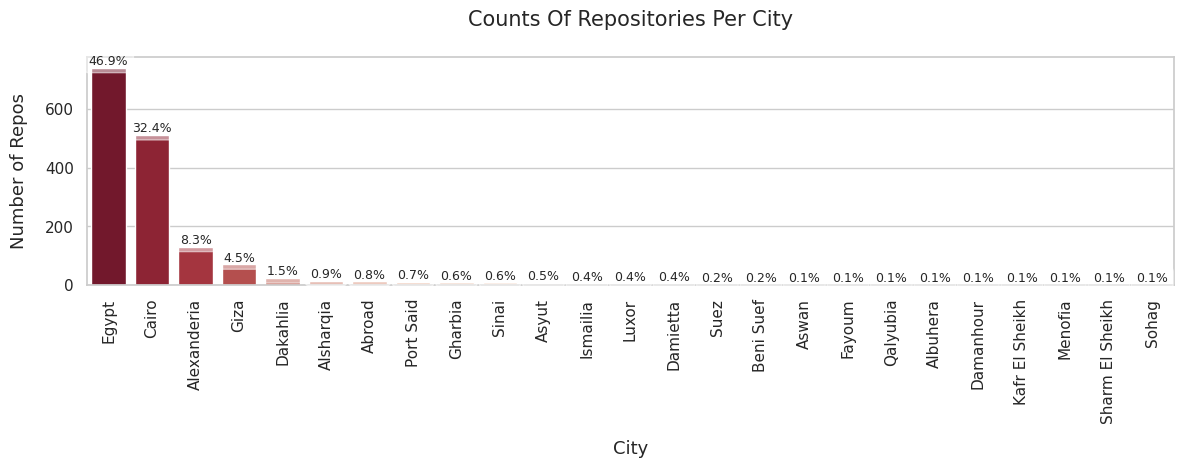

In [105]:
utils.bar_plot(all_cities, 'city', fontsize=13)

#### Map cities into respective regions

In [132]:
# Define the region mapping
region_mapping = {
    'Greater Cairo': ['Cairo', 'Giza', 'Qalyubia'],
    'Northern Coast': ['Alexanderia', 'Albuhera', 'Damanhour', 'Kafr El Sheikh'],
    'Canal Cities': ['Port Said', 'Ismailia', 'Suez'],
    'Nile Delta': ['Dakahlia', 'Alsharqia', 'Gharbia', 'Damietta', 'Menofia'],
    'Upper Egypt': ['Asyut', 'Beni Suef', 'Fayoum', 'Sohag', 'Luxor', 'Aswan', 'Sinai', 'Sharm El Sheikh'],
    'others': ['Abroad']
}

In [133]:
def get_region(city):
    for region, cities in region_mapping.items():
        if city in cities:
            return region
    return 'Unknown'


all_cities['region'] = all_cities['city'].apply(get_region)
all_cities

,city,count,region
0,Egypt,740,Unknown
1,Cairo,511,Greater Cairo
2,Alexanderia,131,Northern Coast
3,Giza,71,Greater Cairo
4,Dakahlia,24,Nile Delta
5,Alsharqia,14,Nile Delta
6,Abroad,13,others
7,Port Said,11,Canal Cities
8,Gharbia,10,Nile Delta
9,Sinai,9,Upper Egypt


In [134]:
all_regions = all_cities.groupby('region')['count'].sum().reset_index()
all_regions = all_regions.sort_values(by='count', ascending=False)
all_regions

,region,count
4,Unknown,740
1,Greater Cairo,584
3,Northern Coast,134
2,Nile Delta,55
5,Upper Egypt,32
0,Canal Cities,20
6,others,13


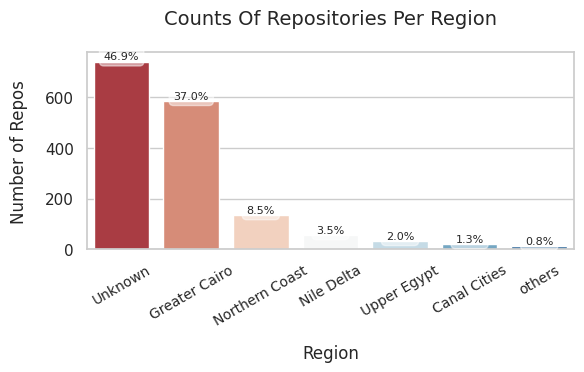

In [135]:
utils.bar_plot(all_regions, 'region', figsize=(6, 4), rotation=30, fontsize=12)

#### Look closely to `Upper Egypt` cities

In [136]:
tmp = all_cities[all_cities['region'] == 'Upper Egypt']
tmp = tmp.rename(columns={'city': 'upper egypt city'})
tmp

,upper egypt city,count,region
9,Sinai,9,Upper Egypt
10,Asyut,8,Upper Egypt
12,Luxor,6,Upper Egypt
15,Beni Suef,3,Upper Egypt
16,Aswan,2,Upper Egypt
17,Fayoum,2,Upper Egypt
23,Sharm El Sheikh,1,Upper Egypt
24,Sohag,1,Upper Egypt


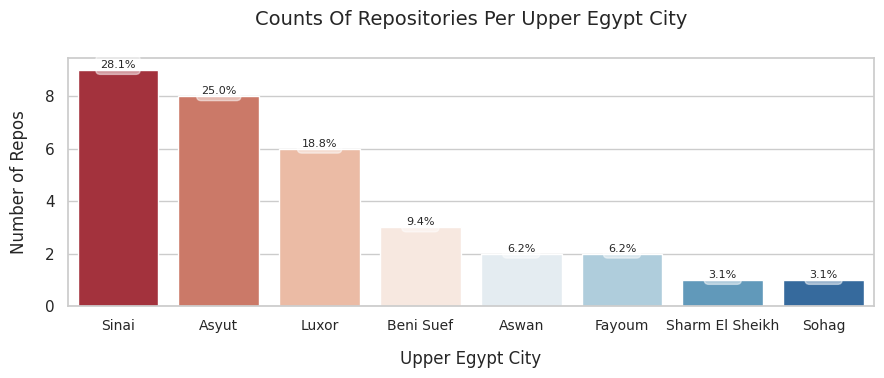

In [137]:
utils.bar_plot(tmp, 'upper egypt city', figsize=(
    9, 4), rotation=0, fontsize=12)

#### Look closely to `Northern Coast` cities

In [138]:
tmp = all_cities[all_cities['region'] == 'Northern Coast']
tmp = tmp.rename(columns={'city': 'northern coast city'})
tmp

,northern coast city,count,region
2,Alexanderia,131,Northern Coast
19,Albuhera,1,Northern Coast
20,Damanhour,1,Northern Coast
21,Kafr El Sheikh,1,Northern Coast


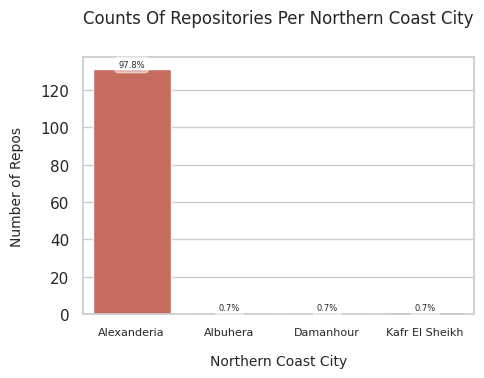

In [139]:
utils.bar_plot(tmp, 'northern coast city',
               figsize=(5, 4), rotation=0, fontsize=10)

#### Look closely to `Nile Delta` cities

In [140]:
tmp = city_value_count[city_value_count['region'] == 'Nile Delta']
tmp = tmp.rename(columns={'city': 'nile delta city'})
tmp

,nile delta city,count,region
4,Dakahlia,24,Nile Delta
5,Alsharqia,14,Nile Delta
8,Gharbia,10,Nile Delta
13,Damietta,6,Nile Delta
22,Menofia,1,Nile Delta


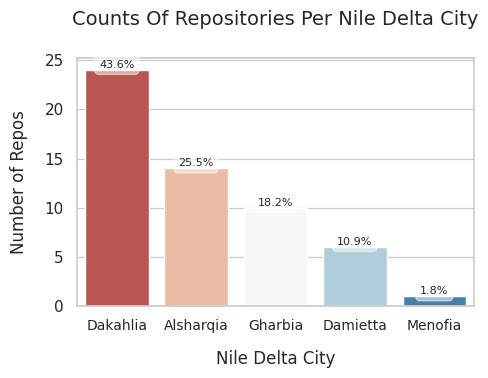

In [141]:
utils.bar_plot(tmp, 'nile delta city', figsize=(5, 4), rotation=0, fontsize=12)

#### Look closely to `Canal Cities` cities

In [142]:
tmp = city_value_count[city_value_count['region'] == 'Canal Cities']
tmp = tmp.rename(columns={'city': 'canal city'})
tmp

,canal city,count,region
7,Port Said,11,Canal Cities
11,Ismailia,6,Canal Cities
14,Suez,3,Canal Cities


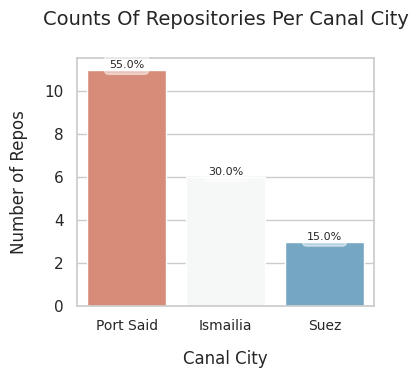

In [143]:
utils.bar_plot(tmp, 'canal city', figsize=(4, 4), rotation=0, fontsize=12)

#### **OBSERVATION** 💡

* Cairo is the center of Egyptian open source contributions, demonstrating a strong tech community. 
* Alexandria showcasing a significant technical presence in the city.
* A diverse range of Egyptian cities display contributions, indicating a growing and widespread open source movement across the country. 


### **Key Observations** 👀

### **General Category**
   - The **General (Egypt)** category has a project count of **740**, which may represent projects that are not tied to specific cities but are still part of Egypt's overall open source community.

#### 1. **Dominance of Greater Cairo Region**
   - The **Greater Cairo Region** (Cairo, Giza) leads with a total of **582 projects**.
   - **Reason:** This dominance can be attributed to the concentration of tech hubs, educational institutions, and a larger population in the capital.

#### 2. **Alexandria & Northern Coast's Notable Contribution**
   - **Alexandria & Northern Coast** comes in second with **134 projects**.
   - **Reason:** Alexandria is home to various universities and technical communities, which likely contributes to its strong presence.

#### 3. **Nile Delta's Balanced Contribution**
   - The **Nile Delta** region contributes **55 projects**.It shows active participation.
   - **Reason:** The presence of tech universities and growing startup ecosystems in cities like Dakahlia and Alsharqia likely support this activity.
   
#### 4. **Underrepresentation in Canal Cities**
   - **Canal Cities** (Port Said, Ismailia, Suez) contribute a total of **20 projects**. Although strategically important, this region appears to have relatively low engagement in open source development compared to other parts of the country.

### 5. **Limited Engagement in Upper Egypt**
   - **Upper Egypt - Middle** and **Upper Egypt - South** combined contribute **22 projects**. The relatively low count of projects from these regions highlights the digital divide between the north and the south of Egypt.
   - This suggests the need for more resources and initiatives to promote open source and tech development in these areas.

### **Conclusions** 💡

- **Cairo** remains the heart of the open source community in Egypt, with most contributions coming from the Greater Cairo area.
- **Alexandria** shows notable participation but remains distant from Cairo's scale.
- Other regions, such as the **Canal Cities** and **Upper Egypt**, show less engagement, presenting potential areas for growth.
- The **Nile Delta** and **Abroad** contributions also highlight important secondary hubs for open source activities.


---
### Question 2:  Top Programming Languages

**Which are the top programming languages used in Egyptian Open Source projects?**

**Statistics:** Count of open source repos, grouped by Programming Language.

* Consider analyzing the distribution of languages across different project categories.


In [164]:
data['language'].isna().sum()

145

> I will tr to impute these missing values using keywords identification.

#### Detect Programming language 
Extract the programming language of a GitHub repository from the description, topics, or filenames. We can use NLP and pattern matching techniques. 
Here's a step-by-step guide and a Python example of how you could approach this:

1. **Identify keywords:** Look for common programming language names in descriptions and topics. we can use a list of language keywords (e.g., `Python`, `JavaScript`, `C++`, etc.).
2. **File extensions:** Analyze the file names (extensions like `.py`, `.js`, `.cpp`, etc.) to detect the language.
3. **Use NLP techniques:** For descriptions, we can tokenize the text and match against the list of known languages.

In [148]:
cols_to_keep = ['topics', 'repo_description', 'filenames', 'language']

missed_lang = data[data['language'].isna()][cols_to_keep].reset_index(drop=True)
missed_lang.shape

(145, 4)

In [149]:
missed_lang['repo_description'].tolist()[4]

'ViewerJS: Document Reader in JavaScript'

In [155]:
# Detect language for each repository
for idx, repo in tqdm(missed_lang.iterrows(), total=len(missed_lang),
                      colour='cyan', desc='Detect Programming Langauge'):

    missed_lang.loc[idx, 'language'] = utils.detect_language(repo)

Detect Programming Langauge: 100%|██████████| 145/145 [00:00<00:00, 225.89it/s]


In [161]:
print("We successed to impute %d instance"% (154 - missed_lang['language'].isna().sum()))

We successed to impute 29 instance


#### Display some imputed langauges instances 


In [162]:
missed_lang[~missed_lang['language'].isna()].reset_index(drop=True)

,topics,repo_description,filenames,language
0,,This is unmodified copy of Google Code hosted CryptoJS project. CryptoJS is a growing collection...,[README.md],JavaScript
1,,ViewerJS: Document Reader in JavaScript,"[README.md, README]",JavaScript
2,,Send email from Gmail Id in Django using HTML Template,[README.md],Python
3,,JavaScript interview Questions,"[README.md, LICENSE]",JavaScript
4,"contributer, girlscript-foundation, gssoc22, open-source, open-source-contributions, open-source...",Learn Cpp from Beginner to Advanced ✔ Practice 🎯 Code 💻 Repeat 🔁 One step solution for c++ be...,"[README.md, Contributing.md]",C++
5,,List of 1000 JavaScript Interview Questions,[README.md],JavaScript
6,,A tiny list limited to the best JavaScript Learning Resources,"[package.json, contributing.md, readme.md, pull_request_template.md]",JavaScript
7,,Two racing-car game creating using assembly 86.,"[README.md, LICENSE]",Assembly
8,"automl, aws-sagemaker, azure-ml, bentoml, dagshub, django, docker, dvc, fastapi, git, gradio, ku...",All the available resources to master MLOPS from scratch,[README.md],Scratch
9,,A Curated list of Awesome Python Scripts that Automate Stuffs.,[README.md],Python


#### Group repositories by language and count occurrences

In [166]:
language_counts = pd.DataFrame(data['language'].value_counts()).reset_index()
language_counts

,language,count
0,Python,281
1,JavaScript,189
2,Dart,126
3,C++,118
4,Java,114
5,TypeScript,100
6,PHP,91
7,C#,71
8,HTML,61
9,Kotlin,47


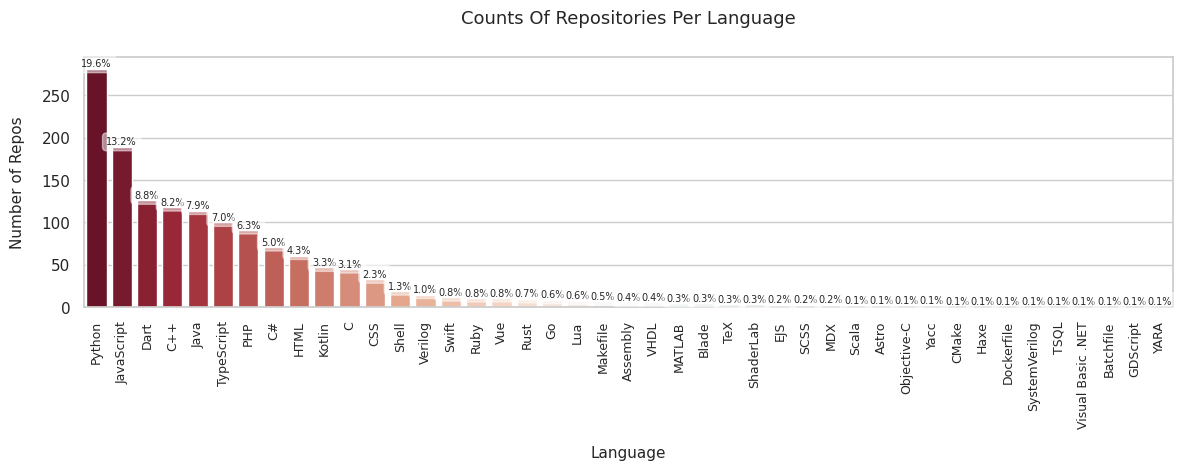

In [169]:
# Create a bar chart for language distribution
utils.bar_plot(df=language_counts, feature='language', fontsize=11)


### **Key Observations** 👀

### 1. **Prevalence of Python**
   - **Python** leads the pack with **281 projects**, making it the most popular language in the Egyptian open-source community. 
   - **Reson:** The popularity can be attributed to its versatility and ease of use, especially in fields like data science, machine learning, and web development.

### 2. **Strong Presence of JavaScript**
   - **JavaScript** ranks second with **189 projects**. 
   - **Reason:** As a crucial language for web development, its widespread use in front-end and back-end frameworks (e.g., Node.js) likely contributes to its popularity.

### 3. **Emergence of Dart**
   - **Dart** follows closely with **126 projects**.
   - Indicating a growing interest in Flutter for mobile app development. 
   - This reflects the community's engagement with modern mobile technologies.

### 4. **C++ and Java's Steady Engagement**
   - **C++** and **Java** have substantial counts of **118** and **114 projects**, respectively. 
   - These languages remain relevant in various domains, including **system programming** and **enterprise-level** applications.

### 5. **TypeScript's Growing Popularity**
   - **TypeScript** shows a solid count of **100 projects**.
   - This highlighting a trend towards statically typed languages in web development.

### 6. **Diversity in Language Usage**
   - The variety of programming languages, from **PHP** (91 projects) to **Rust** (10 projects), demonstrates a diverse set of interests and applications within the community. 
   
### 7. **Low Representation for Emerging Languages**
   - Languages like **Rust**, **Go**, and **Lua** have relatively low project counts (10, 9, and 8, respectively), suggesting they are still gaining traction within the community. 
   - This could indicate a potential area for growth as developers explore these modern programming languages.

### **Conclusions** 💡

- The Egyptian open-source community exhibits a strong preference for **Python** and **JavaScript**, indicating active engagement in web and data-centric projects.
- The interest in **Dart** reflects emerging trends in mobile app development, while **TypeScript** is gaining traction among developers prioritizing type safety.
- The diversity in programming language usage highlights the community's potential for innovation and collaboration, with various languages being utilized for different applications.


---
### Question 3: Most Popular and Active Projects

**What is the top 20 projects: Ranked by contributors, commits, stars, and forks?**

In [190]:
tmp = data[['repo_name', 'owner', 'name', 'repo_html_url',
            'forks_count', 'stargazers_count', 'contribs_count', 'commits_count']]
tmp.isna().sum()

repo_name           0
owner               0
name                0
repo_html_url       0
forks_count         0
stargazers_count    0
contribs_count      0
commits_count       0
dtype: int64

##### **Multi-level Sorting**

List of the top 20 Egyptian open source projects based on a a multi-level sorting approach to identify the top 20 Egyptian open source projects based on the following criteria:

1. **Stargazers Count (Descending)**
   - Projects with more stars are ranked higher, indicating greater popularity and interest.

2. **Forks Count (Descending)**
   - Within projects with similar star counts, projects with more forks are ranked higher, suggesting a wider adoption and usage. 

3. **Contributors Count (Descending)**
   - Within projects with similar star and fork counts, projects with more contributors are ranked higher, highlighting active community involvement.

4. **Commits Count (Descending)**
   - Finally, within projects with similar star, fork, and contributor counts, projects with more commits are ranked higher, suggesting ongoing development and maintenance.

**Output:**

- After the sorting, the `top_20_repos` DataFrame contains the top 20 projects ranked by this multi-level sorting approach.


In [192]:
top_20_repos = tmp.sort_values(
    by=['stargazers_count', 'forks_count', 'contribs_count', 'commits_count'],
    ascending=[False, False, False, False]
).head(20)

print("Top 20 Egyptian Open Source Projects:")
top_20_repos

Top 20 Egyptian Open Source Projects:


,repo_name,owner,name,repo_html_url,forks_count,stargazers_count,contribs_count,commits_count
467,Sublist3r,aboul3la,Ahmed Aboul-Ela,https://github.com/aboul3la/Sublist3r,2104,9734,21,30.0
571,DeepLearning.ai-Summary,mbadry1,Mahmoud Badry,https://github.com/mbadry1/DeepLearning.ai-Summary,2444,5151,22,30.0
372,autoComplete.js,TarekRaafat,Tarek,https://github.com/TarekRaafat/autoComplete.js,237,3939,30,30.0
365,Shell,moudey,Mahmoud Gomaa,https://github.com/moudey/Shell,113,3372,27,30.0
574,Competitive-programming-library,AhmadElsagheer,Ahmad Elsagheer,https://github.com/AhmadElsagheer/Competitive-programming-library,472,2445,16,30.0
650,Cr3dOv3r,D4Vinci,Karim shoair,https://github.com/D4Vinci/Cr3dOv3r,411,2011,7,30.0
653,One-Lin3r,D4Vinci,Karim shoair,https://github.com/D4Vinci/One-Lin3r,291,1662,6,30.0
652,Dr0p1t-Framework,D4Vinci,Karim shoair,https://github.com/D4Vinci/Dr0p1t-Framework,372,1379,4,30.0
1322,WinPaletter,Abdelrhman-AK,,https://github.com/Abdelrhman-AK/WinPaletter,56,1360,8,30.0
1296,MyBrain,mhss1,Mohamed Shaaban,https://github.com/mhss1/MyBrain,83,1209,11,30.0


In [209]:
melted_data = top_20_repos.head(10).melt(
    id_vars='repo_name',
    value_vars=['stargazers_count', 'forks_count', 'contribs_count'],
    var_name='Metric',
    value_name='Count'
)
melted_data

,repo_name,Metric,Count
0,Sublist3r,stargazers_count,9734
1,DeepLearning.ai-Summary,stargazers_count,5151
2,autoComplete.js,stargazers_count,3939
3,Shell,stargazers_count,3372
4,Competitive-programming-library,stargazers_count,2445
5,Cr3dOv3r,stargazers_count,2011
6,One-Lin3r,stargazers_count,1662
7,Dr0p1t-Framework,stargazers_count,1379
8,WinPaletter,stargazers_count,1360
9,MyBrain,stargazers_count,1209


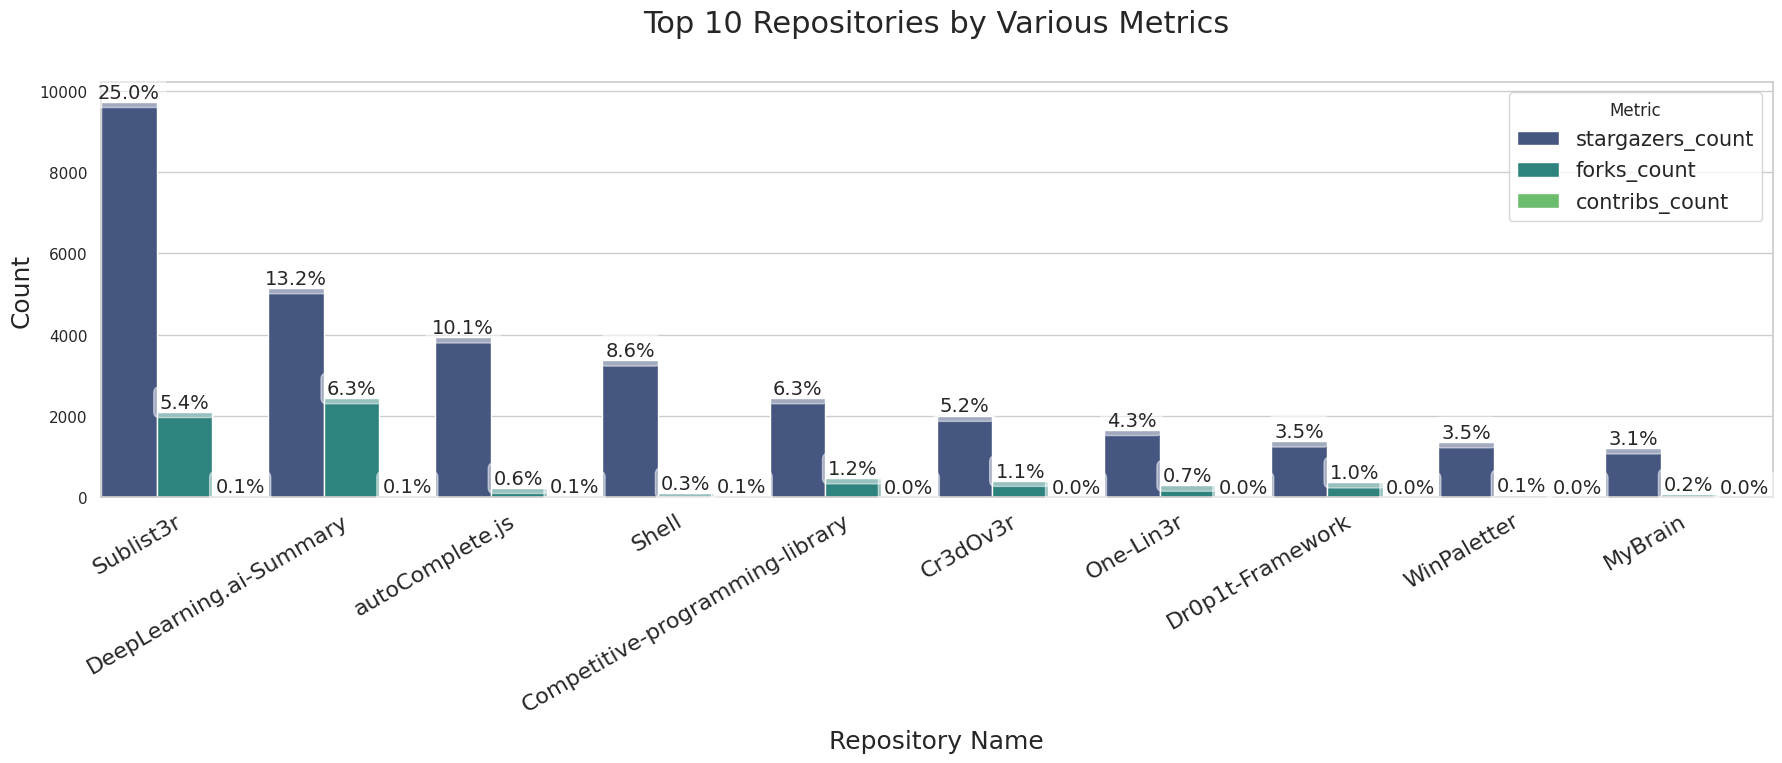

In [222]:
plt.figure(figsize=(18, 8))
palette_color = sns.color_palette('viridis', melted_data['Metric'].nunique())  

# Create the bar plot
bar_plot = sns.barplot(x='repo_name', y='Count', hue='Metric',
                       width=1, data=melted_data, palette=palette_color)

plt.xticks(fontsize=16, rotation=30, ha="right")
plt.title('Top 10 Repositories by Various Metrics', y=1.1, fontsize=22)
plt.xlabel('Repository Name', fontsize=18, labelpad=10)
plt.ylabel('Count', fontsize=18)

# Total count for percentage calculation
total_count = melted_data['Count'].sum()

# Add percentage labels on top of the bars with background
for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total_count) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=14,
                      bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.3'))  # Added bbox

plt.legend(title="Metric", fontsize=15)
plt.tight_layout()
plt.show()

### **Key Observations** 👀

1. **High Popularity of Utility and Security Tools**
   - The top projects, such as **Sublist3r** (9734 stars) and **autoComplete.js** (3939 stars), demonstrate strong community interest in tools for security and web development. 
   - **Sublist3r** is a well-known subdomain enumeration tool, which aligns with the growing focus on cybersecurity.
   - Similarly, **Shell** and **Cr3dOv3r**, which are tools designed to enhance user productivity, show significant community involvement.

2. **Machine Learning Gaining Traction**
   - **DeepLearning.ai-Summary** is one of the top-ranked projects with (5151 stars) and (2444 forks).
   - It is indicating that machine learning has a notable presence in Egypt's open-source community. 
   - It highlights interest in educational content and frameworks related to AI.

3. **Active Community Involvement in Web and Competitive Programming**
   - **Competitive-programming-library** by **AhmadElsagheer** ranks high with 472 forks, highlighting the significance of competitive programming within the Egyptian tech community. 
   - It suggests a strong educational or learning-driven motivation behind open-source contributions.

4. **Number of Contributors: ** 
   - Projects like **autoComplete.js**, **Shell**, and **DeepLearning.ai-Summary** show a healthy number of contributors and commits, indicating that they are actively maintained and improved over time. 
   - Some projects, despite having high star and fork counts, have relatively fewer contributors (e.g., **MyBrain** and **WinPaletter**). It might suggest that while these projects are popular, they are primarily driven by individual efforts or smaller teams. 

5. **Number of Froks:**
   - Projects like **Sublist3r** and **DeepLearning.ai-Summary** are widely forked, with over 2000 forks each, showcasing serve as templates or foundational tools that many developers build upon.

### **Conclusions**💡
   
   - The top 20 projects reflect a wide range of fields, including front-end tools (e.g., **autoComplete.js**), cybersecurity (e.g., **Cr3dOv3r**), machine learning (e.g., **DeepLearning.ai-Summary**), and utilities (e.g., **Shell**). This diversity highlights the broad skill set and interests within the Egyptian open-source community.
   - The list of projects spans various developers, indicating that Egypt's open-source ecosystem is not dominated by a single entity but involves diverse contributors, each contributing unique tools and solutions to the global community.
   - The analysis highlights several key projects that have gained traction within the Egyptian open-source community, particularly in web development and machine learning.




---
### Question 4: Non-Egyptian Projects with Egyptian Contributors

**Which Non-Egyptian project (think Kubernetes or Firefox) that has the most Egyptian developers contributing?**
I scraped 2000 top non-Egyptian repositories and reviewed all the contributors. In the end, I stored the profile of each contributor whose location is listed as Egypt.

In [75]:
contributors_file_path = "./data/processed/egyption_contribs.csv"
egy_contributors = pd.read_csv(contributors_file_path)
egy_contributors.head()

,repo_owner,repo_name,login,name,location,email,bio,public_repos,public_gists,followers,following,created_at,updated_at
0,codecrafters-io,build-your-own-x,xmonader,xmonader,Egypt,xmonader@gmail.com,I chase monads i...,749,45,246,69,2009-03-17T02:03...,2024-09-29T13:10...
1,freeCodeCamp,freeCodeCamp,Sboonny,Muhammed Mustafa,Egypt,MuhammedElruby@g...,Enjoy coding and...,99,0,83,24,2021-07-31T17:45...,2024-03-20T09:36...
2,codecrafters-io,build-your-own-x,xmonader,xmonader,Egypt,xmonader@gmail.com,I chase monads i...,749,45,246,69,2009-03-17T02:03...,2024-09-29T13:10...
3,Pythagora-io,gpt-pilot,kerollosy,Kerollos Emad,Egypt,NaN,NaN,14,0,4,1,2021-06-17T00:42...,2024-09-15T22:01...
4,facebookresearch,faiss,AbdelrahmanElmen...,Abdelrahman Ashr...,Egypt,abdelrhman.elmen...,Computer and Sys...,14,2,11,1,2019-07-13T21:27...,2024-10-09T11:52...


In [76]:
egy_contributors['login'].value_counts()

login
xmonader                2
Sboonny                 1
kerollosy               1
AbdelrahmanElmeniawy    1
ahmadalfy               1
Mostafa-Samir           1
seiko2plus              1
hatemhosny              1
mmghv                   1
Name: count, dtype: int64

---
### Question 5: Top Industries/Topics

**What are the top 20 industries or topics that Egyptians build open source projects for?**

**Statistics:** Bar Chart and Tag cloud, Aggregating the Industry or Tags of all the repos.

* Analyze the `topics` field from GitHub repositories. 
* Use keyword extraction or topic modeling techniques (e.g., LDA) to identify relevant topics and industries.


In [77]:
from collections import Counter

all_topics = []
for index, row in data.iterrows():

    if isinstance(row['topics'], str):
        all_topics.extend(row['topics'].split(', '))
    else:
        continue

In [78]:
topic_counts = Counter(all_topics)
top_20_topics = topic_counts.most_common(20)

/root/miniconda3/envs/arab_open_source/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


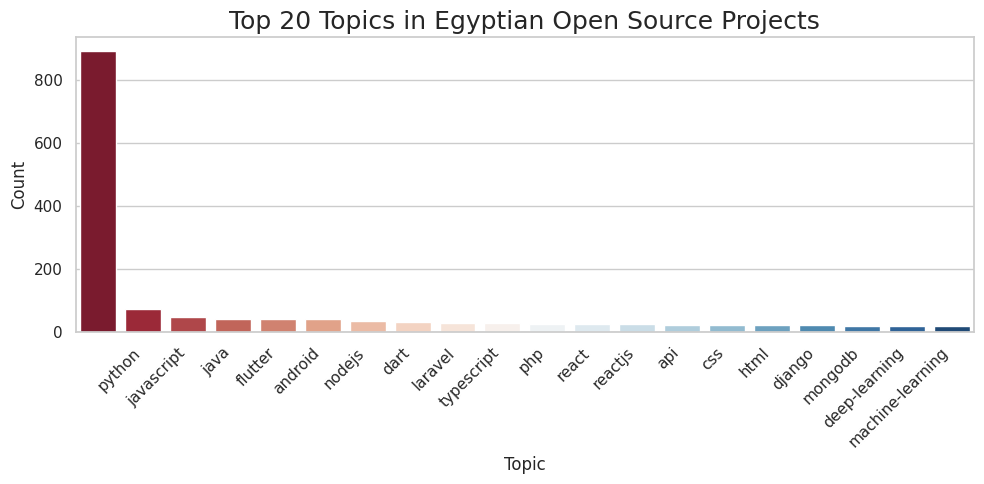

In [79]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[topic for topic, _ in top_20_topics],
            y=[count for _, count in top_20_topics])
plt.xticks(range(len(top_20_topics)), [
           topic for topic, _ in top_20_topics], rotation=45, ha="right")
plt.title("Top 20 Topics in Egyptian Open Source Projects", fontsize=18)
plt.xlabel("Topic")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

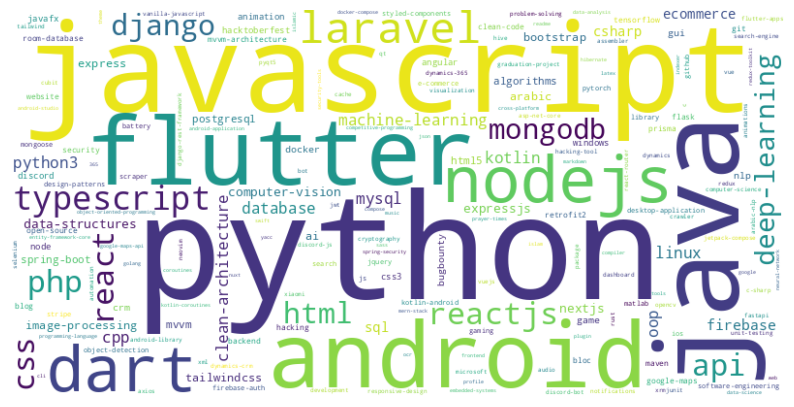

In [80]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate_from_frequencies(topic_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### OBSERVATIONS💡
Use **Topic Modelling** to discover hidden topics within your Egyptian open source projects. 


#### Make Topic Modeling using Bertopic

In [100]:
# Iterate through the data and merge the text fields
for idx, repo in tqdm(data.iterrows(), colour='cyan',
                      total=len(data), desc='Create merged text'):

    # Merge 'repo_description' and 'topics' into one text string
    if isinstance(repo['language'], str):
        language = [repo['language'].lower()]
    else:
        language = []

    text_list = repo['repo_description'].lower().split(
    ) + repo['topics'].lower().split(",") + language

    merged_text = ' '.join(text_list)

    # Assign the merged text back to the 'text' column
    data.loc[idx, 'text'] = merged_text

Create merged text: 100%|██████████| 1579/1579 [00:00<00:00, 1661.31it/s]


In [102]:
all_topics = data['text']
all_topics[5]

'generate early-bound code from a crm schema using a customisable t4 template. 365  bound  crm  dynamics  dynamics-365  dynamics-crm  early  early-bound  generate  generator  microsoft  plugin  t4  template  xrm  xrmtoolbox  yagasoft c#'

In [110]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", verbose=True)
# all_topics is the list of all docs (string of all topics)
topics, probabilities = topic_model.fit_transform(all_topics)

2024-10-11 18:27:45,167 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

2024-10-11 18:31:05,571 - BERTopic - Embedding - Completed ✓
2024-10-11 18:31:05,604 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-11 18:31:52,257 - BERTopic - Dimensionality - Completed ✓
2024-10-11 18:31:52,272 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-11 18:31:52,481 - BERTopic - Cluster - Completed ✓
2024-10-11 18:31:52,532 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-11 18:31:52,713 - BERTopic - Representation - Completed ✓


In [111]:
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,246,-1_and_to_the_python,"[and, to, the, python, is, for, it, of, with, in]",[about this specialization .. ai is transformi...
1,0,160,0_javascript_nodejs_react_typescript,"[javascript, nodejs, react, typescript, ecomme...",[simple hospital management system in node.js ...
2,1,147,1_flutter_android_dart_app,"[flutter, android, dart, app, kotlin, and, to,...","[youtube flutter app dart, graduation project..."
3,2,83,2_verilog_kernel_assembly_xiaomi,"[verilog, kernel, assembly, xiaomi, vhdl, asse...",[4.14 kernel source with linux-stable merged i...
4,3,57,3_laravel_php_filament_package,"[laravel, php, filament, package, admin, api, ...",[laravel grapes is a library for laravel frame...
5,4,55,4_python_approximation_linear_airdroid,"[python, approximation, linear, airdroid, anti...","[ python, python, python]"
6,5,51,5_geometry_albiruniml_timewarrior_csharp,"[geometry, albiruniml, timewarrior, csharp, po...",[quantity system is an attempt to make a frame...
7,6,50,6_dart_exoplanets_flutter_revolutionize,"[dart, exoplanets, flutter, revolutionize, fix...","[ dart, dart, dart]"
8,7,48,7_typescript_plugin_deno_angular,"[typescript, plugin, deno, angular, for, scite...","[ typescript, typescript, typescript]"
9,8,47,8_javascript_ciede2000_canvas_remake,"[javascript, ciede2000, canvas, remake, viewer...","[ javascript, javascript, javascript]"


In [113]:
# Reduce the number of topics
# Set nr_topics to the desired number of topics
topic_model.reduce_topics(all_text, nr_topics=20)

top_20_topics = topic_model.get_topic_info()
top_20_topics

2024-10-11 18:32:16,519 - BERTopic - Topic reduction - Reducing number of topics
2024-10-11 18:32:16,699 - BERTopic - Topic reduction - Reduced number of topics from 36 to 20


,Topic,Count,Name,Representation,Representative_Docs
0,-1,246,-1_and_to_the_python,"[and, to, the, python, for, is, of, with, it, in]",[about this specialization .. ai is transformi...
1,0,223,0_typescript_javascript_nodejs_react,"[typescript, javascript, nodejs, react, for, e...","[ typescript, typescript, typescript]"
2,1,197,1_dart_flutter_android_app,"[dart, flutter, android, app, kotlin, and, to,...","[ dart, dart, dart]"
3,2,188,2_verilog_kernel_and_for,"[verilog, kernel, and, for, assembly, in, of, ...",[4.14 kernel source code (lawrun kernel) for x...
4,3,165,3_python_django_of_to,"[python, django, of, to, the, and, for, from, ...","[ python, python, python]"
5,4,77,4_php_laravel_package_filament,"[php, laravel, package, filament, admin, for, ...","[ php, php, php]"
6,5,77,5_java_engine_oop_springboot,"[java, engine, oop, springboot, javafx, search...","[ java, java, java]"
7,6,66,6_github_repository_awesome_list,"[github, repository, awesome, list, profile, f...",[:gem: a curated list of awesome competitive p...
8,7,47,7_javascript_ciede2000_canvas_viewerjs,"[javascript, ciede2000, canvas, viewerjs, phot...","[ javascript, javascript, javascript]"
9,8,44,8_crm_csharp_system_api,"[crm, csharp, system, api, dynamics, core, asp...",[a very powerful crm solution that gives a mul...


In [115]:
topic_model.visualize_topics()

#### **OBSERVATION** 💡

The analysis of topics extracted from the Egyptian open source project data using BERTopic reveals interesting themes and trends including web development, machine learning, mobile development, and computer science education. 

**1. Programming Languages & Frameworks:**

- **Python:** Python is a prominent language, with projects focusing on web development using Django and Flask. The presence of scikit-learn and other libraries highlights machine learning and data science applications.
- **Java:**  Java is another popular choice, with a strong emphasis on backend development using Maven, JUnit, and Mockito. 
- **JavaScript:** JavaScript is widely used for web development, with projects related to web security, frameworks like Vue.js and React, and frontend libraries like React Native. 
- **Flutter:**  The prevalence of Flutter, a cross-platform mobile development framework, points to a growing focus on mobile development within the community.  
- **Node.js:**  The presence of Node.js indicates its use for server-side and web development, potentially in combination with other JavaScript libraries and frameworks.

**2.  Machine Learning and Data Science:**

- **Machine Learning & Deep Learning:** There's a strong interest in machine learning and deep learning, with topics like CNN, neural networks, and image processing.

**3.  Web Development & Security:**

- **Web Security:**  Security considerations are evident, with topics like penetration testing, hacking, and various types of vulnerabilities.
- **Web Development:**  A significant focus on building user interfaces and applications using various frameworks and libraries (Vue, React, etc.)

**4.  Mobile Development:**

- **Android (Topic 13):**  A dedicated topic for Android development highlights its importance in the community. 

**5.  Other Notable Themes:**

- **Computer Science & Education:**  Projects related to computer science education, internships, and learning resources are present, suggesting a focus on knowledge sharing and training.
- **Arabic Language:** The use of Arabic in various projects indicates a growing emphasis on supporting the Arabic language and its unique characteristics. 



----
### Question 6: Top Frameworks and Libraries

**What are the Top Frameworks and top libraries used in Egyptian open source projects?**

**Solution:** 

The goal is to identify the most frequently used frameworks and libraries within the projects, which provides insights into the technology landscape of the community.

1. **Data Extraction:**
   - The code first extracts the list of dependencies from the `egy_df['dependencies']` column. This data was likely fetched from the GitHub dependency graph API, which provides information on the packages and libraries a project relies on.

2. **Data Cleaning:**
     - It removes leading and trailing whitespace using `dep.strip()`.
     - It removes specific characters ("@", "'", "[" and "]") using a regular expression `re.sub(r'[@\'\[\]]', '', dep)`.

3. **Dependency Extraction:**
   - The code then splits each dependency by "." and "/" and extracts the first part (the library or framework name). This assumes that dependencies follow a common format where the last part of the string represents the library or framework.

In [146]:
import json

# Load the JSON data
with open("./data/json_files/all_dependencies.json", "r", encoding='utf-8') as file:
    dependencies = json.load(file)

# Extract all dependencies into a single list
all_dependencies = []

# Loop through each repository and append dependencies if they exist
for item in dependencies:
    if len(item['dependencies']) > 0:
        # Use 'extend' to flatten the list
        all_dependencies.extend(item['dependencies'])

print(f"Total number of dependencies: {len(all_dependencies)}")

Total number of dependencies: 245129


In [161]:
cleaned_dependencies = []
for dep in all_dependencies:
    # Clean the dependency
    cleaned_dep = re.sub(r'[@\'\[\]]', '', dep.strip())

    if cleaned_dep:  # Check if not empty after cleaning
        # Extract the first part before '.' and '/'
        cleaned_dependencies.append(cleaned_dep.split(".")[0].split("/")[0])

# Display the first 10 cleaned dependencies
print(cleaned_dependencies[:5])

['json-loader', 'sinon', 'extract-text-webpack-plugin', 'url-loader', 'babel-eslint']


In [162]:
dependency_count = Counter(cleaned_dependencies)
# Create an empty DataFrame
deps_df = pd.DataFrame(columns=['dependency', 'count'])

for idx, (dep, count) in enumerate(dependency_count.items()):
    deps_df.loc[idx, 'dependency'] = dep
    deps_df.loc[idx, 'count'] = count

In [163]:
deps_df = deps_df.sort_values(
    by='count', ascending=False).reset_index(drop=True)
deps_df

,dependency,count
0,babel,16777
1,types,6488
2,webassemblyjs,1962
3,esbuild,1807
4,lodash,1645
...,...,...
10642,react-ssr-prepass,1
10643,ext-dom,1
10644,derive-valtio,1
10645,ext-simplexml,1


In [167]:
top_20_dependencies = deps_df.head(20)
top_20_dependencies

,dependency,count
0,babel,16777
1,types,6488
2,webassemblyjs,1962
3,esbuild,1807
4,lodash,1645
5,jest,1345
6,typescript-eslint,1072
7,jridgewell,1013
8,symfony,927
9,svgr,836


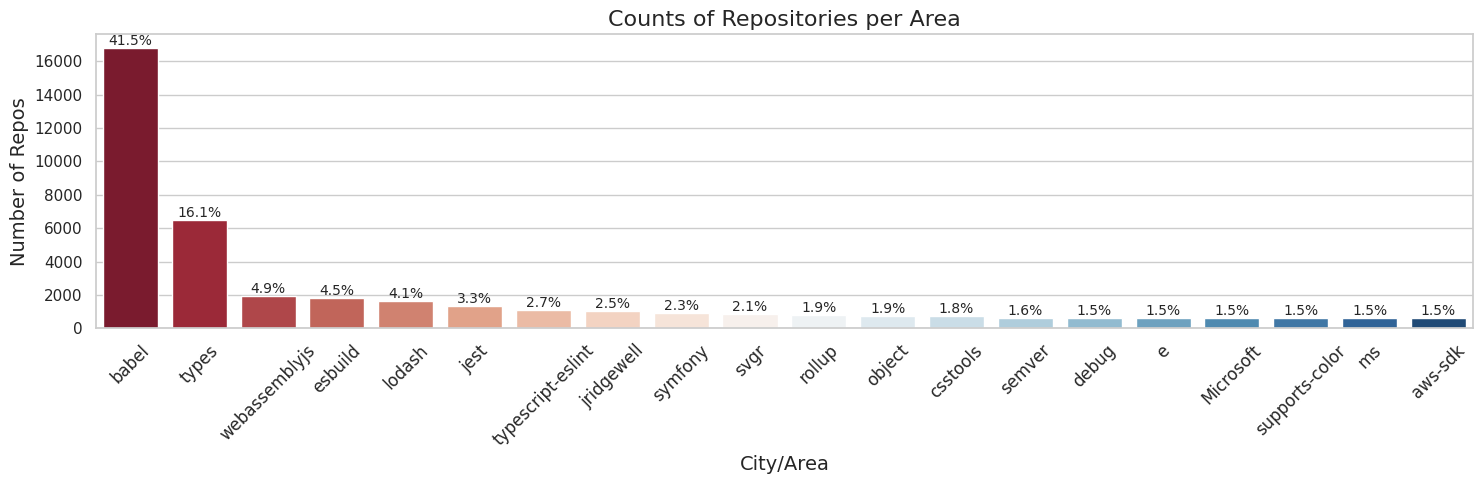

In [169]:
utils.bar_plot(df=top_20_dependencies, feature='dependency',
               figsize=(15, 5), rotation=45)

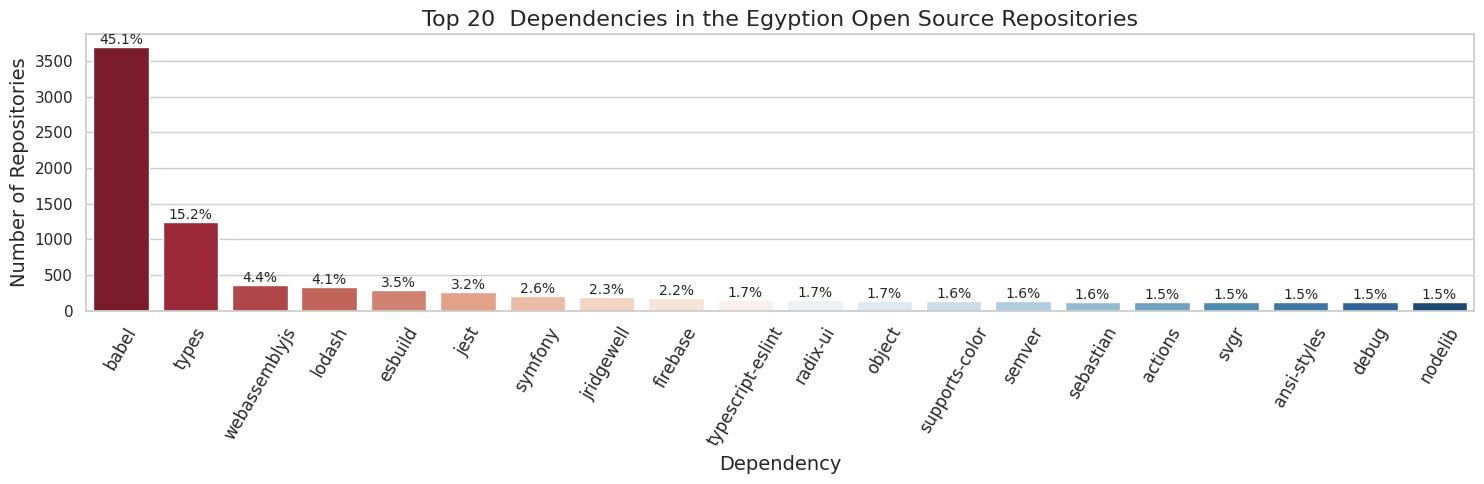

In [ ]:
palette_color = sns.color_palette('RdBu', len(dependency_count_df))

plt.figure(figsize=(15, 5))
bar_plot = sns.barplot(x='Dependency', y='Count',
                       data=dependency_count_df, palette=palette_color)

plt.xticks(rotation=60, fontsize=12)
plt.title(
    'Top 20  Dependencies in the Egyption Open Source Repositories', fontsize=16)
plt.xlabel('Dependency', fontsize=14)
plt.ylabel('Number of Repositories', fontsize=14)
plt.tight_layout()

# Total count for percentage calculation
total_count = dependency_count_df['Count'].sum()

# Add percentage labels on top of the bars
for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total_count) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10)

plt.show()

#### OBSERVATION 💡

**JavaScript Frameworks and Libraries Dominate:**

* **`babel` (3689)** is the clear leader, highlighting the prevalence of JavaScript development in the Egyptian open source community. Babel is a widely used tool for transpiling modern JavaScript code to older versions compatible with various browsers.
* **`webassemblyjs` (358)**, a library for compiling WebAssembly modules, signifies the increasing importance of WebAssembly in web development, enabling performance improvements and cross-platform compatibility.
* **`typescript` (143)** and **"typescript-eslint" (143)** are commonly used, reflecting the popularity of TypeScript, a strongly typed superset of JavaScript that helps in building more robust and maintainable applications.
* **`jest` (265)**, a popular JavaScript testing framework, indicates a strong emphasis on testing in the Egyptian open source projects.

**Popular Front-End Libraries and Frameworks:**

* **`lodash` (336)** is a versatile utility library that provides a wide range of functions for working with arrays, objects, strings, and more. Its widespread use suggests the importance of efficient and reusable code within projects.
* **`radix-ui` (143)** is a library for building accessible and customizable user interface components, emphasizing the importance of usability and good design principles. 
* **`vue` (34)** is a progressive JavaScript framework for building user interfaces, suggesting its adoption in web development projects.

**Backend and Infrastructure Tools:**

* **`firebase` (177)**, a backend-as-a-service platform, signifies its use for features such as database, authentication, and real-time functionality.
* **`express` (39)**, a popular `Node.js` web framework, indicates the use of Node.js for backend development in Egyptian projects.
* **`actions` (124)**, a GitHub Actions workflow automation tool, points to the adoption of continuous integration and continuous delivery (CI/CD) practices within the community.

**Other Framewords:**

* While JavaScript-related tools dominate the list, other libraries and frameworks are also present. 
For instance, **`python` (2), `symfony` (211), `django` (3)**, and **`nestjs` (12)** show that languages like Python and PHP are also used, with associated frameworks for web and backend development.

**Conclusion:**

The top 20 dependencies reveal a vibrant and active Egyptian open source community with a strong focus on web development using JavaScript and its related frameworks and libraries. This analysis also highlights the importance of testing, accessibility, and backend technologies within the community. 




---
### Question 7: Top Databases

**What are the Top Databases used by these projects?**



In [ ]:
# Convert string representations of dictionaries to actual dictionaries
egy_df['temp'] = egy_df['database_type'].apply(ast.literal_eval)

# Extract database names
egy_df['database'] = egy_df['temp'].apply(
    lambda x: list(x.keys()) if isinstance(x, dict) else [])

# Flatten the list of databases
flattened_databases = [db for sublist in egy_df['database'] for db in sublist]

# Calculate co-occurrences using Counter
co_occurrences = Counter(flattened_databases)

# Convert to DataFrame for visualization
co_occurrences_df = pd.DataFrame(
    co_occurrences.items(), columns=['Database', 'Count'])
co_occurrences_df

,Database,Count
0,Elasticsearch,218
1,PostgreSQL,7
2,Firebase,5
3,MongoDB,8
4,SQLite,7
5,MySQL,11
6,Oracle,1
7,Redis,3
8,SQL Server,1
9,TSQL,1


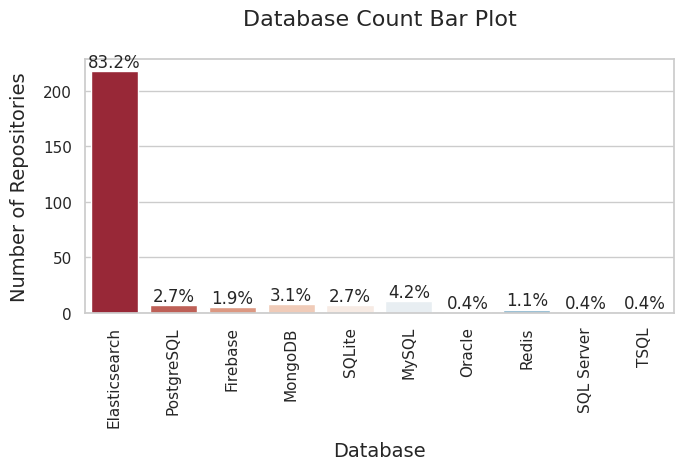

In [ ]:
plt.figure(figsize=(7, 5))
palette_color = sns.color_palette('RdBu', len(co_occurrences_df))

bar_plot = sns.barplot(data=co_occurrences_df, x='Database',
                       y='Count', palette=palette_color)
plt.title('Database Count Bar Plot', fontsize=16, y=1.1)
plt.ylabel('Number of Repositories', fontsize=14, labelpad=10)
plt.xlabel('Database', fontsize=14, labelpad=10)
plt.xticks(rotation=90)
plt.tight_layout()

# Add percentage labels on top of the bars
total_count = co_occurrences_df['Count'].sum()

for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total_count) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12)

plt.show()

#### **OBSERVATION** 💡

* **Elasticsearch** stands out as the most popular database within this dataset, with a significant count of 218. 
* **MongoDB** and **MySQL** are used with a moderate frequency, indicating they are popular choices as well. 
* The remaining databases have considerably lower counts, indicating they are used less frequently. 

---
### Question 8: Project Documentation Quality

**How many projects are well-documented?**

1. **Checking for Basic Stuff:**
   - Looking at each repo and see if there are any files at all. If it's completely empty, we give it a zero score --> not documented!
   - Looking for a special folder called "docs". If it's there, we give it extra points because it suggests the repo is really dedicated to documentation.
   - Checking for common files like `README.md` or `README.rst` --> repo has the basic intro to a project, so repo get some points too.

2. **Analyzing the README:**
   - If a `README` file is found, we look inside it! 
   - Checking for sections talking about "contributing" (for how people can help the project), "description" (telling what the project is about), and instructions on how to "install", "run", or "start" the project. 
   - If those sections are found, we give the repo more points.

3. **Looking for Setup Files:**
   - Searching for specific files that indicate how to set up the project, like:
     - `setup.py`  (used for Python projects)
     - `requirements.txt` (listing dependencies)
     - `package.json` (for JavaScript projects)
     - `environment.yml`  (used with tools like conda)
     - `Pipfile`  (used with pipenv)
     - `setup.cfg`  (for configuration)
   - Finding any of these means that the repo has good instructions on how to get started, so give it extra points.

4. **Finding API Documentation:**
   - Searching for any links or files that suggest there's API documentation (like files ending in `.json` or pages talking about "Swagger" or "OpenAPI").
   - If API documentation is found, the repo is given even more points because it's really important for well-documented projects.

5. **Adding Up the Scores:**
   - Adding all the points for each repo based on what Ifound.  
   - The higher the score, the better documented the repo is.

#### Top 20 Well-documented Repository

In [ ]:
scores = []
for index, row in tqdm(repos_df.iterrows(), total=len(repos_df),
                       desc="Documentation Scoring"):
    assessor = GitHubDocAssessor(row)
    repos_df.loc[index, 'documentation_score'] = assessor.assess_documentation()

In [ ]:
well_documented_repos = egy_df.sort_values(
    by='documentation_score', ascending=False)
top_20_well_documented_repos = well_documented_repos[[
    'repo_name', 'name', 'documentation_score', 'repo_html_url']].head(20)
print(top_20_well_documented_repos.to_string())

                         repo_name                     name  documentation_score                                             repo_html_url
25                          aktive           Kerollos Magdy                    6                        https://github.com/kerolloz/aktive
107               dorar-hadith-api            أحمد الطبراني                    6       https://github.com/AhmedElTabarani/dorar-hadith-api
198                  DevCampersAPI           Mahmoud Yasser                    6              https://github.com/Braineanear/DevCampersAPI
137                     El-Messiri            Mohamed Gaber                    5                    https://github.com/Gue3bara/El-Messiri
136                          Cairo            Mohamed Gaber                    5                         https://github.com/Gue3bara/Cairo
438                         JQuran              Loay Ghreeb                    5                      https://github.com/LoayGhreeb/JQuran
354                       S

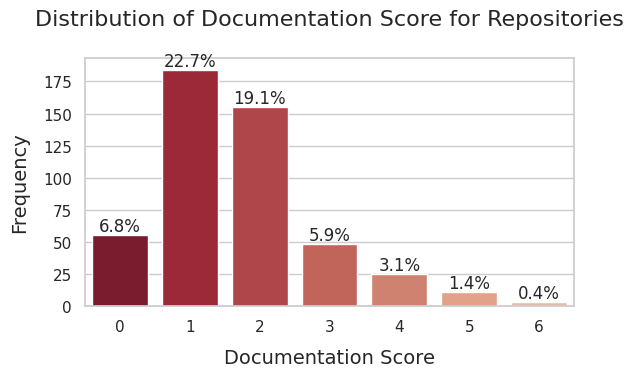

In [ ]:
plt.figure(figsize=(6, 4))
palette_color = sns.color_palette('RdBu', 20)

bar_plot = sns.countplot(data=well_documented_repos,
                         x='documentation_score', palette=palette_color)
plt.title("Distribution of Documentation Score for Repositories",
          fontsize=16, y=1.1)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.xlabel('Documentation Score', fontsize=14, labelpad=10)
plt.tight_layout()

# Add percentage labels on top of the bars
total = well_documented_repos['documentation_score'].sum()

for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12)

plt.show()

---
### Question 9: Pull Request Activity

**How many pull requests are open versus merged in the projects?**

* Analyze the status of pull requests (open, merged, closed).

In [ ]:
egy_df['open_pull_requests'] = egy_df['open_pull_requests_count'].fillna(
    0).astype(int)
egy_df['closed_pull_requests'] = egy_df['closed_pull_requests_count'].fillna(
    0).astype(int)
egy_df['merged_pull_requests'] = egy_df['merged_pull_requests_count'].fillna(
    0).astype(int)

pull_requests_data = pd.DataFrame({
    'Pull Request Type': ['Open Pull Requests', 'Closed Pull Requests', 'Merged Pull Requests'],
    'Count': [egy_df['open_pull_requests'].sum(), egy_df['closed_pull_requests'].sum(), egy_df['merged_pull_requests'].sum()]
})

pull_requests_data

,Pull Request Type,Count
0,Open Pull Requests,468
1,Closed Pull Requests,2642
2,Merged Pull Requests,0


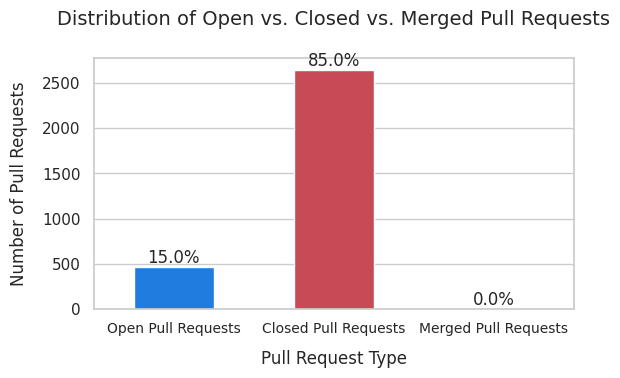

In [ ]:
plt.figure(figsize=(6, 4))

bar_plot = sns.barplot(data=pull_requests_data, x='Pull Request Type', y='Count',
                       palette=['#007bff', '#dc3545', '#123445'], width=0.5)

plt.title("Distribution of Open vs. Closed vs. Merged Pull Requests",
          y=1.1, fontsize=14)
plt.xlabel("Pull Request Type", labelpad=10, fontsize=12)
plt.ylabel("Number of Pull Requests", labelpad=10, fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()

# Add percentage labels on top of the bars
total = pull_requests_data['Count'].sum()

for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12)

plt.show()

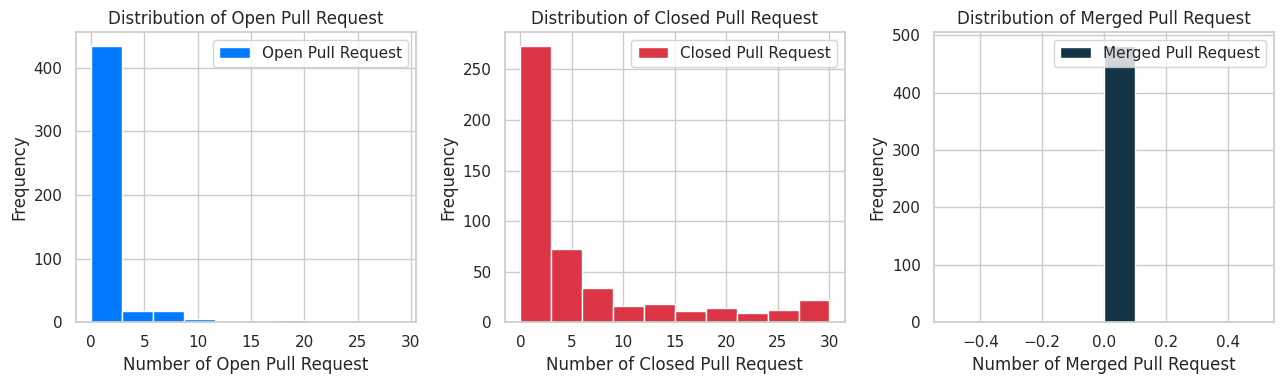

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Create the first histogram (Open Pull Request)
axes[0].hist(egy_df['open_pull_requests'],
             label='Open Pull Request', color="#007bff")

axes[0].set_title("Distribution of Open Pull Request")
axes[0].set_xlabel("Number of Open Pull Request")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Create the second histogram (Closed Pull Request)
axes[1].hist(egy_df['closed_pull_requests'],
             label='Closed Pull Request', color="#dc3545")

axes[1].set_title("Distribution of Closed Pull Request")
axes[1].set_xlabel("Number of Closed Pull Request")
axes[1].set_ylabel("Frequency")
axes[1].legend()


# Create the second histogram (Merged Pull Request)
axes[2].hist(egy_df['merged_pull_requests'],
             label='Merged Pull Request', color="#123445")

axes[2].set_title("Distribution of Merged Pull Request")
axes[2].set_xlabel("Number of Merged Pull Request")
axes[2].set_ylabel("Frequency")
axes[2].legend()

plt.tight_layout()
plt.show()

#### **OBSERVATION** 💡

* The project has a significantly higher number of closed pull requests compared to open pull requests, suggesting active development and a good rate of code review and merging.

* The distribution of all the requests are heavily skewed towards the left, with most projects having a very small number of requests.
* No merged pull requests

---
### Question 10: Issue Tracking Activity

**What is the distribution of open versus closed issues across projects?**

* Analyze the status of issues (open, closed).

In [ ]:
egy_df['open_issue'] = egy_df['open_issue'].fillna(0).astype(int)
egy_df['closed_issue'] = egy_df['closed_issue'].fillna(0).astype(int)

issue_data = pd.DataFrame({
    'Issue Type': ['Open Issues', 'Closed Issues'],
    'Count': [egy_df['open_issue'].sum(), egy_df['closed_issue'].sum()]
})
issue_data

,Issue Type,Count
0,Open Issues,482
1,Closed Issues,1283


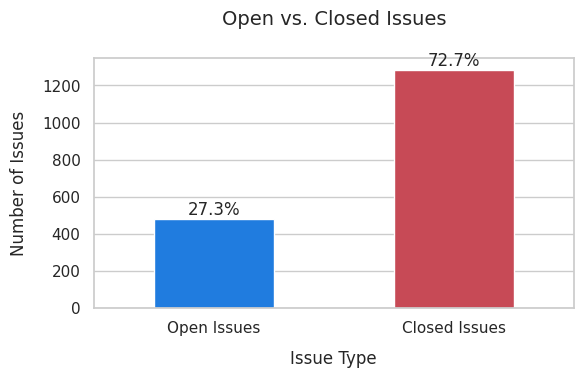

In [ ]:
plt.figure(figsize=(6, 4))

bar_plot = sns.barplot(x='Issue Type', y='Count', data=issue_data,
                       palette={'Open Issues': '#007bff', 'Closed Issues': '#dc3545'}, width=0.5)

plt.title("Open vs. Closed Issues", y=1.1, fontsize=14)
plt.xlabel("Issue Type", labelpad=10, fontsize=12)
plt.ylabel("Number of Issues", labelpad=10, fontsize=12)
plt.tight_layout()

# Add percentage labels on top of the bars
total = issue_data['Count'].sum()

for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12)

plt.show()

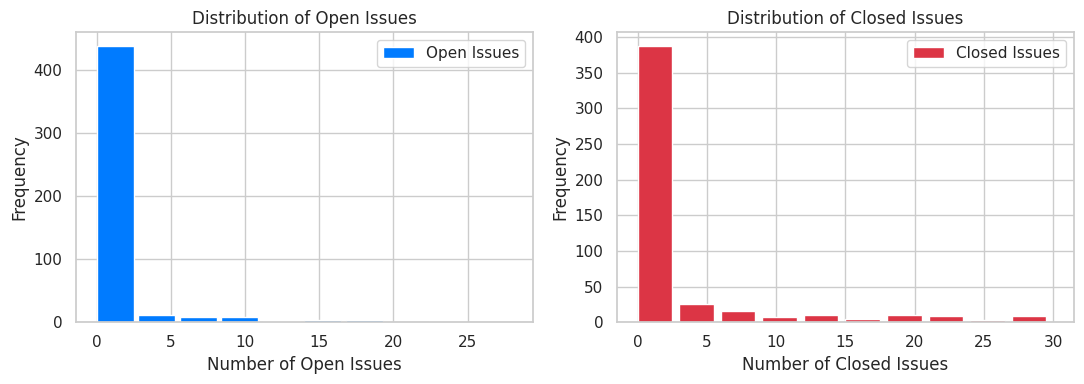

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Create the first histogram (Open Issues)
axes[0].hist(egy_df['open_issue'], width=2.5,
             label='Open Issues', color="#007bff")

axes[0].set_title("Distribution of Open Issues")
axes[0].set_xlabel("Number of Open Issues")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Create the second histogram (Closed Issues)
axes[1].hist(egy_df['closed_issue'], width=2.5,
             label='Closed Issues', color="#dc3545")

axes[1].set_title("Distribution of Closed Issues")
axes[1].set_xlabel("Number of Closed Issues")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

#### **OBSERVATION** 💡

* The project has significantly more closed issues than open issues. 
* This suggests the project is actively maintained and that issues are being resolved at a reasonable pace.
* The distributions are skewed towards the left, with a large number of projects having very few open and closed issues.

---
### Question 11: Top Licenses

**Top 10 licenses used in the projects (MIT, BSD, Apache, GPL, etc)**

* Analyze the frequency of different licenses used in the projects using the `license` field.


In [ ]:
# Group repositories by license and count occurrences
license_counts = egy_df['license'].value_counts()
license_counts

license
MIT License                                                   151
GNU General Public License v3.0                                31
Apache License 2.0                                             14
Other                                                          12
SIL Open Font License 1.1                                       5
GNU General Public License v2.0                                 3
Creative Commons Attribution 4.0 International                  3
GNU Affero General Public License v3.0                          3
Creative Commons Zero v1.0 Universal                            2
The Unlicense                                                   2
BSD 2-Clause "Simplified" License                               1
Creative Commons Attribution Share Alike 4.0 International      1
GNU Lesser General Public License v3.0                          1
Mozilla Public License 2.0                                      1
Name: count, dtype: int64

In [ ]:
merged_license_counts = {
    'MIT': license_counts['MIT License'],
    'Apache': license_counts['Apache License 2.0'],
    'SIL Open Font ': license_counts['SIL Open Font License 1.1'],
    'Mozilla Public': license_counts['Mozilla Public License 2.0'],
    'BSD 2-Clause': license_counts['BSD 2-Clause "Simplified" License'],
    'GNU General': license_counts['GNU General Public License v3.0'] + license_counts['GNU General Public License v2.0'] + license_counts['GNU Affero General Public License v3.0'] + license_counts['GNU Lesser General Public License v3.0'],
    'Creative Commons': license_counts['Creative Commons Attribution 4.0 International'] + license_counts['Creative Commons Zero v1.0 Universal'] + license_counts['Creative Commons Attribution Share Alike 4.0 International'],
    'Other': license_counts['Other'] + license_counts['The Unlicense']

}

license_df = pd.DataFrame.from_dict(merged_license_counts, orient='index', columns=[
                                    'Count']).sort_values(by='Count', ascending=False).reset_index()
license_df

,index,Count
0,MIT,151
1,GNU General,38
2,Other,14
3,Apache,14
4,Creative Commons,6
5,SIL Open Font,5
6,Mozilla Public,1
7,BSD 2-Clause,1


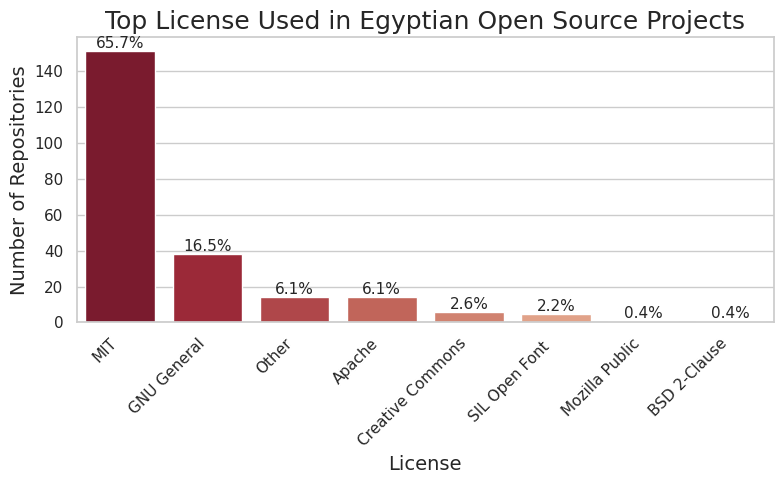

In [ ]:
plt.figure(figsize=(8, 5))

bar_plot = sns.barplot(
    x=license_df['index'], y=license_df['Count'], palette=palette_color)

plt.title("Top License Used in Egyptian Open Source Projects", fontsize=18)
plt.xlabel("License", fontsize=14)
plt.ylabel("Number of Repositories", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


# Add percentage labels on top of the bars
total = license_df['Count'].sum()

for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=11)

plt.show()

#### **OBSERVATION** 💡

* The MIT License is overwhelmingly the most popular license choice.
* The GNU General Public License (GPL) are also significantly used. 
* The Apache License 2.0 is another popular permissive license, granting freedom to use, modify, and distribute software.
* Creative Commons licenses are commonly used for creative works, providing flexible terms for sharing and adaptation.
* SIL Open Font License is used for open-source fonts.
* The Unlicense:  A public domain dedication, allowing for unrestricted use and distribution.




---
### Question 12: CI/CD Integration

**CI/CD Integration: Number of projects utilizing CI/CD.**


* Use the `ci_cd_tool` field to identify projects that have CI/CD integration.
* Analyze the distribution of CI/CD tools across the projects. 

In [ ]:
no_ci_cd_count = egy_df['ci_cd_tool'].isna().sum()
ci_cd_count = len(egy_df) - ci_cd_count

data = [ci_cd_count, no_ci_cd_count]
labels = ['With CI/CD', 'Without CI/CD']

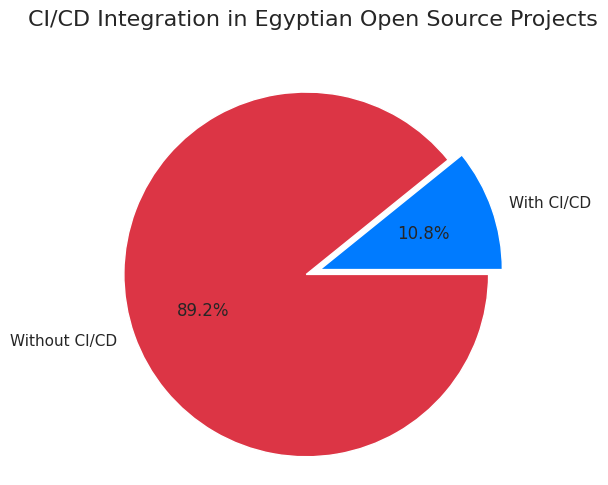

In [ ]:
plt.figure(figsize=(6, 5))

explode = [0, 0.08]
plt.pie(data, labels=labels, explode=explode, autopct='%1.1f%%',
        colors=['#007bff', '#dc3545'])  # Green for "With CI/CD", Red for "Without CI/CD"

plt.title("CI/CD Integration in Egyptian Open Source Projects",
          y=1.1, fontsize=16)

plt.axis('equal')
plt.tight_layout()
plt.show()

#### **OBSERVATION** 💡
The pie chart actually shows that 89.2% of Egyptian open source projects DO NOT utilize CI/CD tools. 

In [ ]:
ci_cd_count_df = pd.DataFrame(
    egy_df['ci_cd_tool'].value_counts()).reset_index()
ci_cd_count_df

,ci_cd_tool,count
0,GitHub Actions,38
1,Travis CI,13
2,Jenkins,1


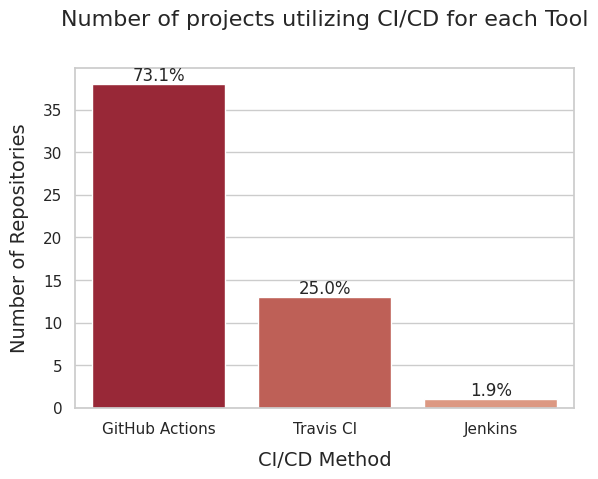

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5))

bar_plot = sns.countplot(x='ci_cd_tool', data=egy_df,
                         ax=ax,  palette=sns.color_palette("RdBu", 10))

plt.title("Number of projects utilizing CI/CD for each Tool", y=1.1, fontsize=16)
plt.xlabel("CI/CD Method", fontsize=14, labelpad=10)
plt.ylabel("Number of Repositories", fontsize=14, labelpad=10)
plt.tight_layout()


# Add percentage labels on top of the bars
total = ci_cd_count_df['count'].sum()

for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12)

plt.show()

#### **OBSERVATION** 💡

The analysis of CI/CD tool usage in Egyptian open source projects reveals the following insights:

- GitHub Actions (38) is the most popular CI/CD tool, indicating its widespread adoption among Egyptian developers. This is likely due to its integration with GitHub, its ease of use, and its growing popularity in the CI/CD systems.
- Travis CI (13) is the second most commonly used CI/CD tool, indicating a level of familiarity and preference among a portion of the community. 
- Jenkins (1) has very limited usage, suggesting it is not a primary choice for CI/CD integration in Egyptian open source projects. While Jenkins is a powerful and highly customizable tool, its setup and configuration can be more complex.